In [145]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [146]:
file_path = 'results/evaluation_results.csv'
df = pd.read_csv(file_path)
groups = df["Nhóm"].unique()
questions = df[["Câu hỏi", "Nhóm"]]

# Biểu diễn dữ liệu

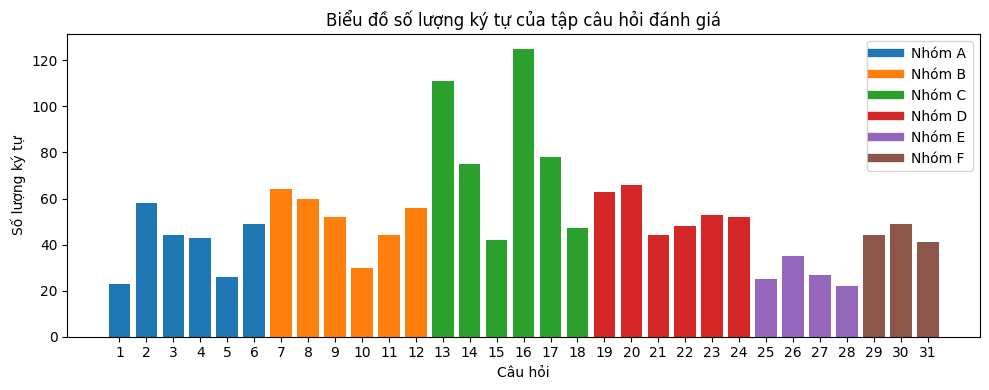

In [147]:
char_lengths = df["Câu hỏi"].str.len()
groups = df["Nhóm"]

x = np.arange(1, len(char_lengths) + 1)

# Map màu cho từng Nhóm
color_map = {
    "A": "tab:blue",
    "B": "tab:orange",
    "C": "tab:green",
    "D": "tab:red",
    "E": "tab:purple",
    "F": "tab:brown"
}

colors = groups.map(color_map)

plt.figure(figsize=(10, 4))
plt.bar(x, char_lengths, color=colors)

plt.xlabel("Câu hỏi")
plt.ylabel("Số lượng ký tự")
plt.title("Biểu đồ số lượng ký tự của tập câu hỏi đánh giá")
plt.xticks(x)

# Legend thủ công
handles = [
    plt.Line2D([0], [0], color=color, lw=6, label=f"Nhóm {g}")
    for g, color in color_map.items()
    if g in groups.values
]
plt.legend(handles=handles)

plt.tight_layout()
plt.show()

# Biểu diễn kết quả từng phần

In [148]:
def plot_xy_line_by_group(df, cols, title, group_filter):
    import matplotlib.pyplot as plt
    import numpy as np

    # Lọc theo giá trị cột "Nhóm"
    df_f = df[df["Nhóm"] == group_filter]

    if df_f.empty:
        print(f"Không có dữ liệu cho Nhóm = {group_filter}")
        return

    # Index bắt đầu từ 1
    x = np.arange(1, len(df_f) + 1)

    plt.figure(figsize=(12, 5))

    for col in cols:
        plt.plot(
            x,
            df_f[col],
            marker="o",
            label=col
        )

    plt.xlabel("Câu hỏi")
    plt.ylabel("Giá trị")
    plt.title(title)
    plt.xticks(x)
    plt.legend(ncol=3)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


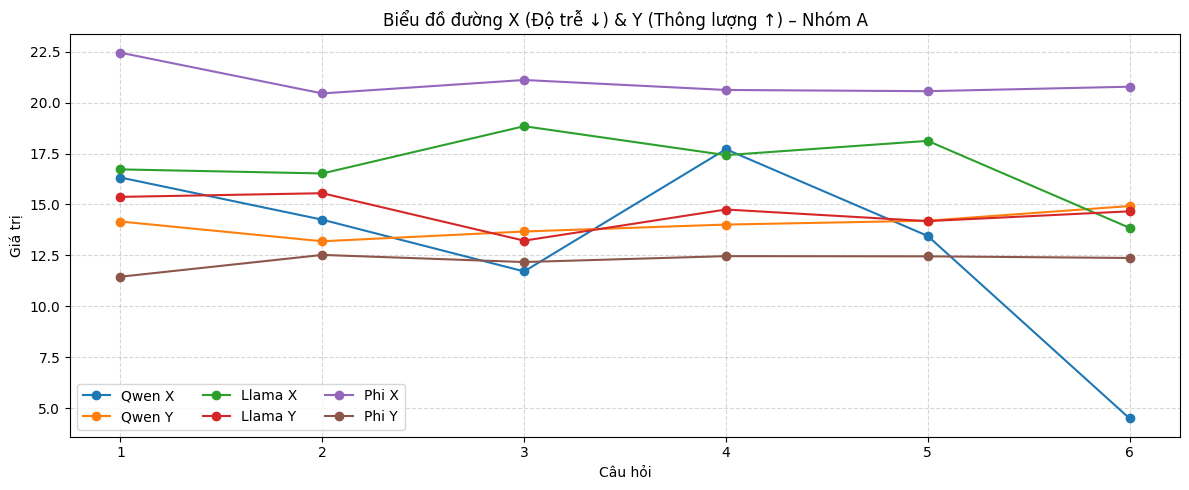

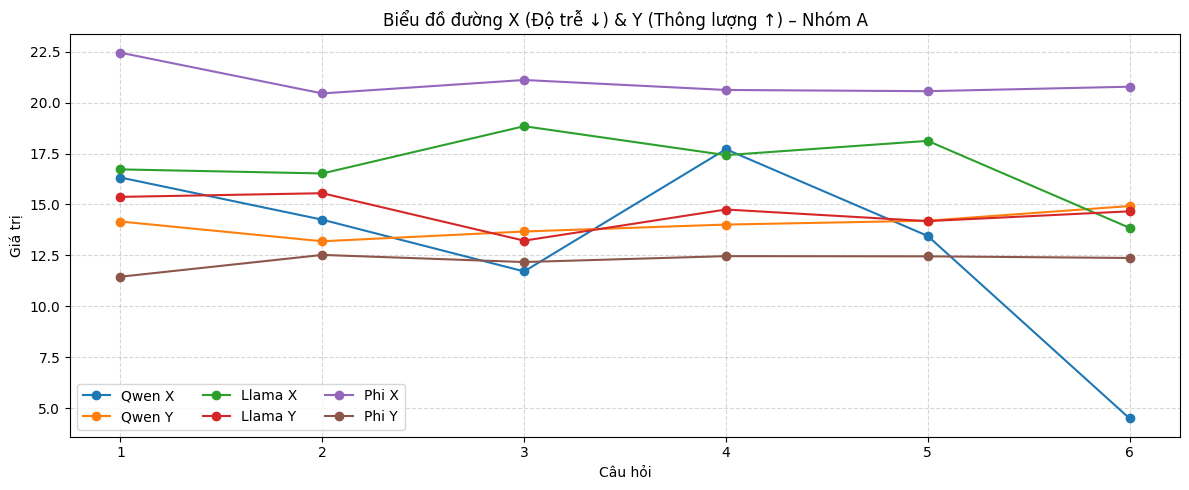

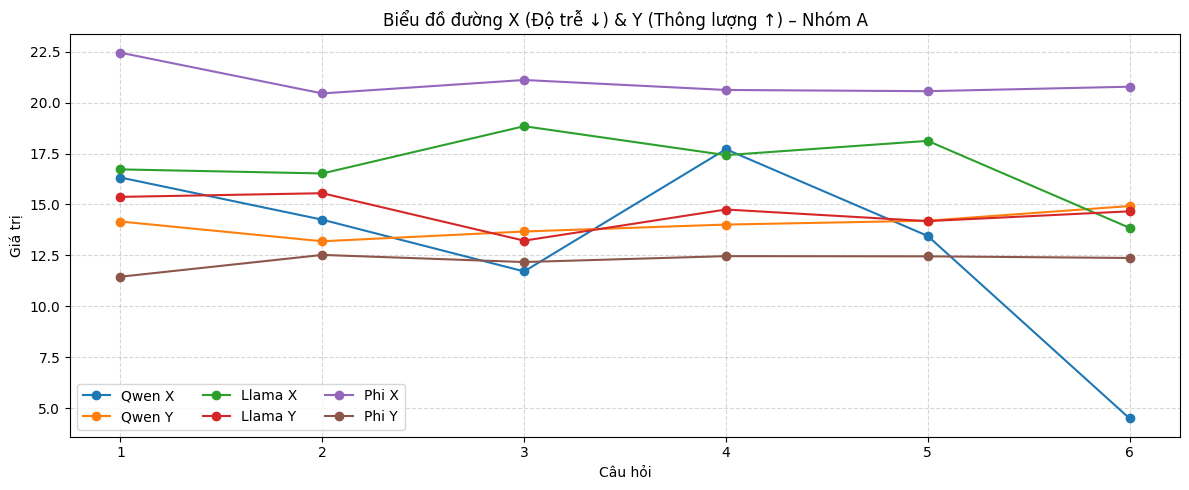

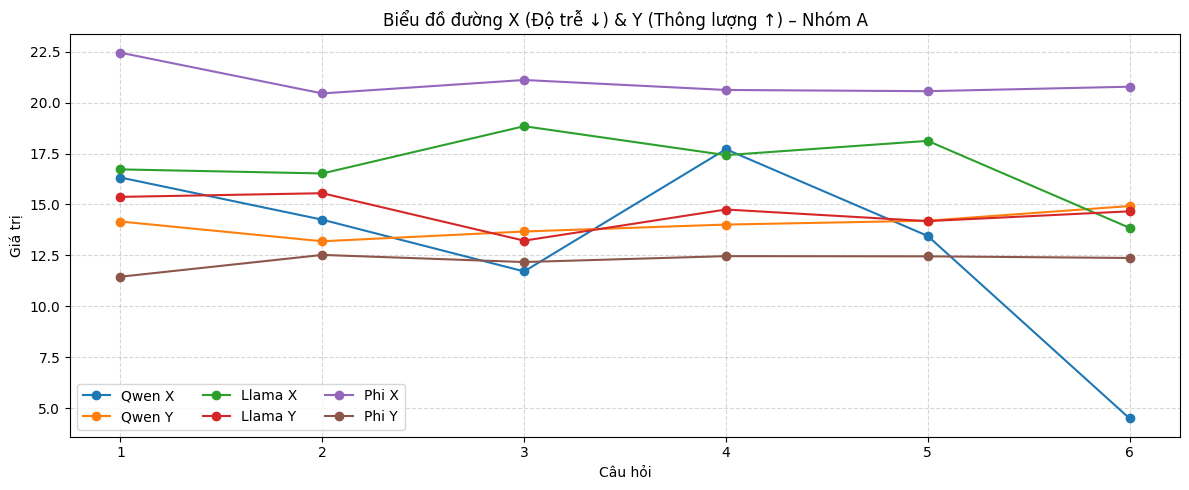

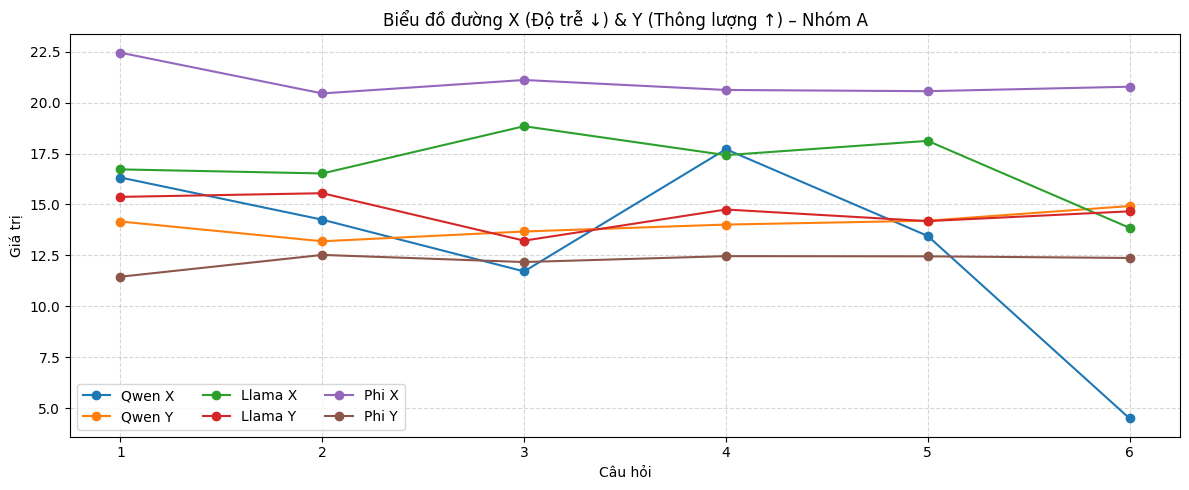

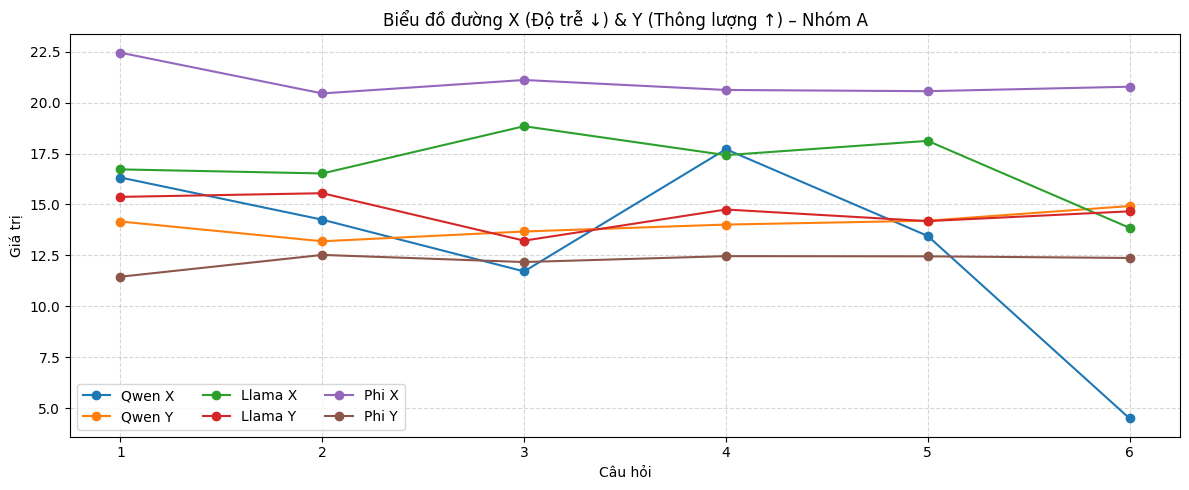

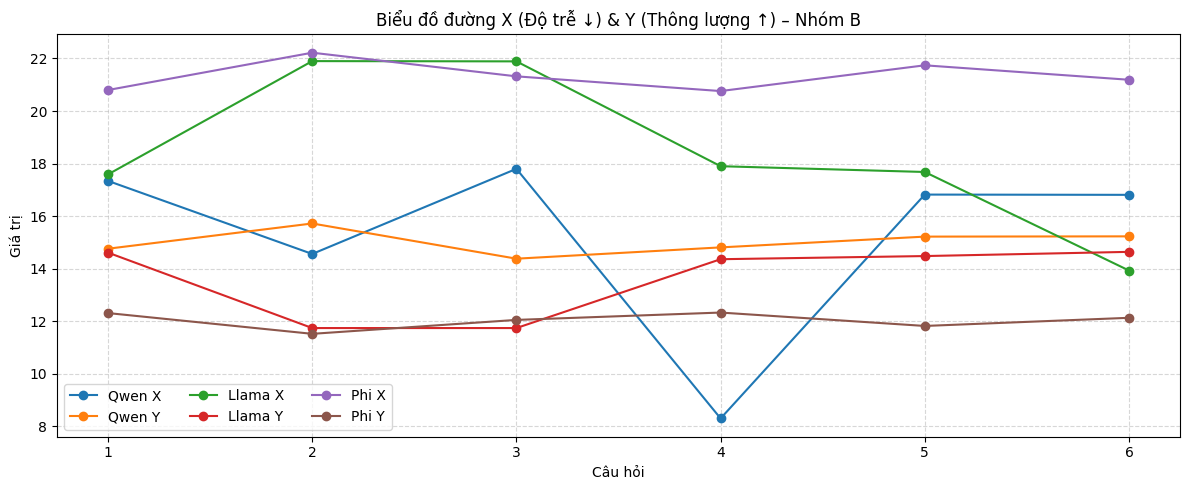

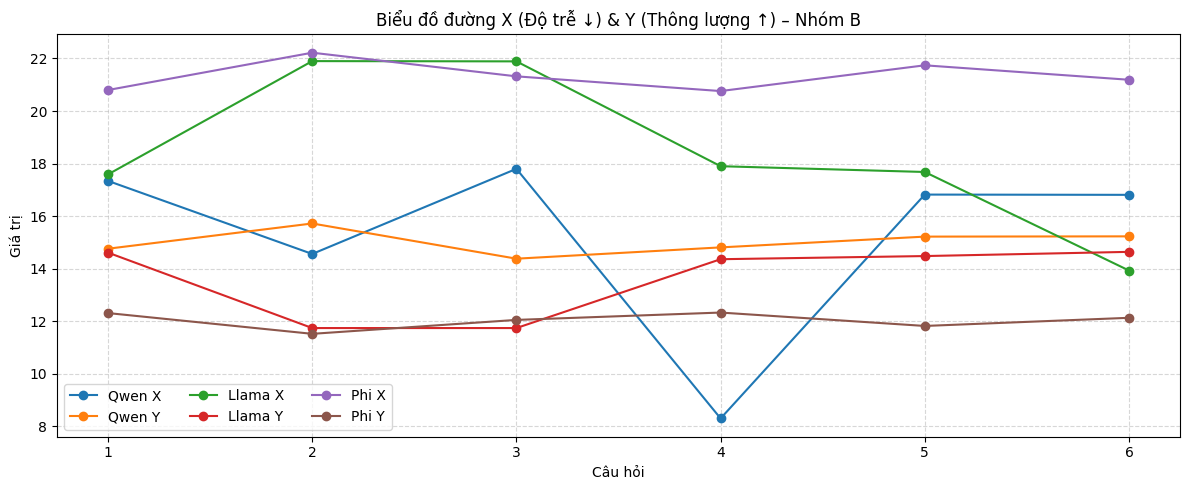

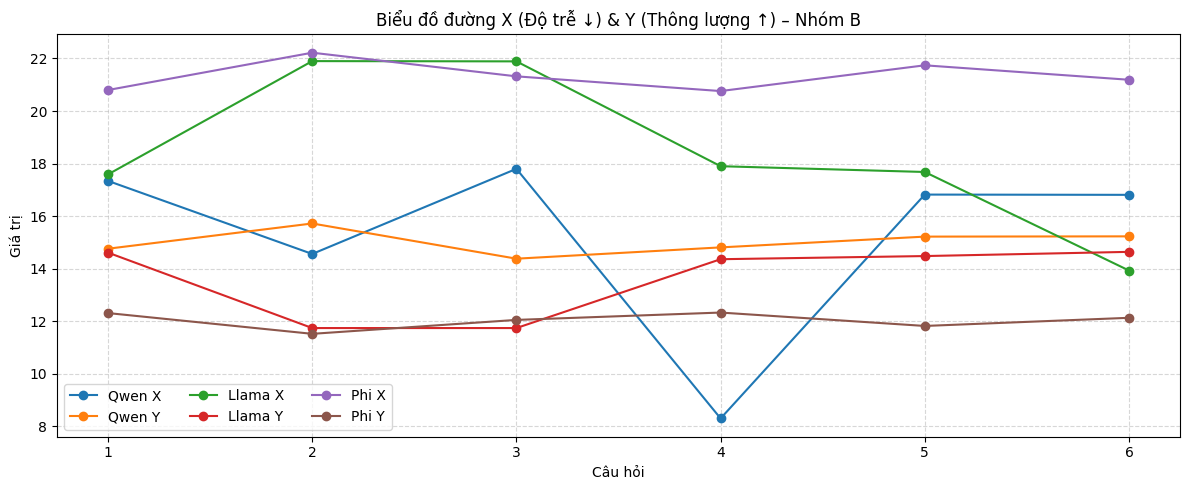

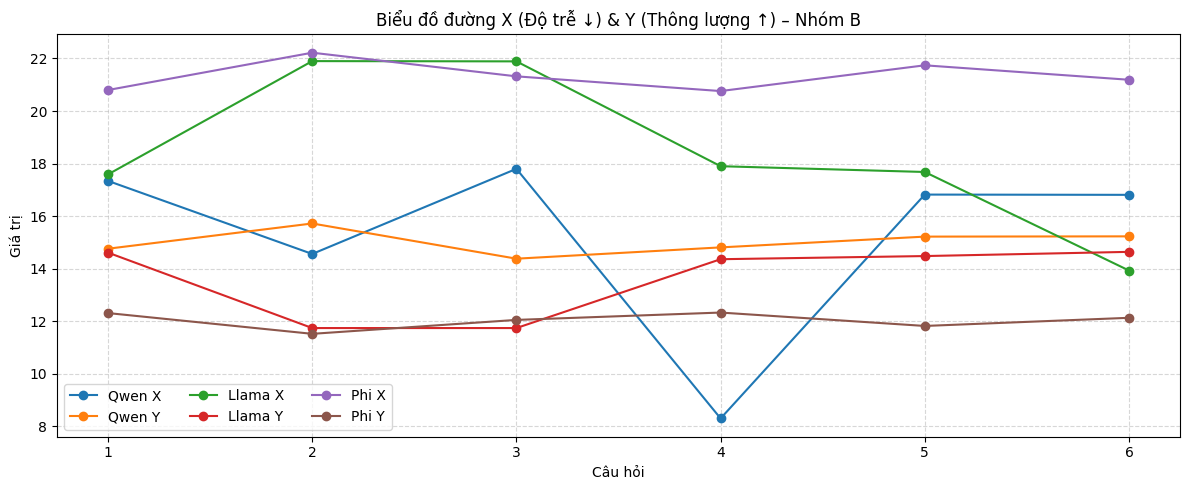

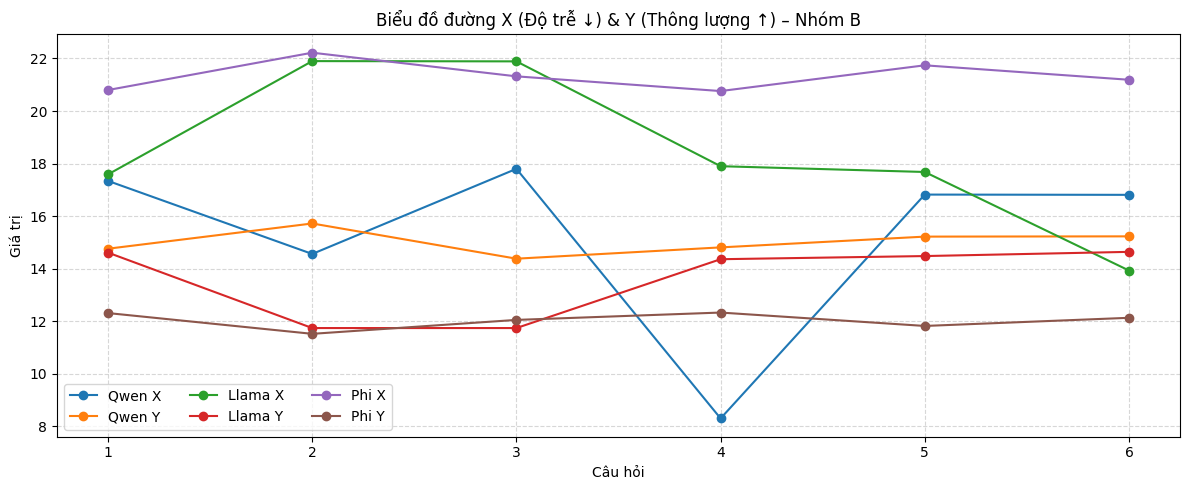

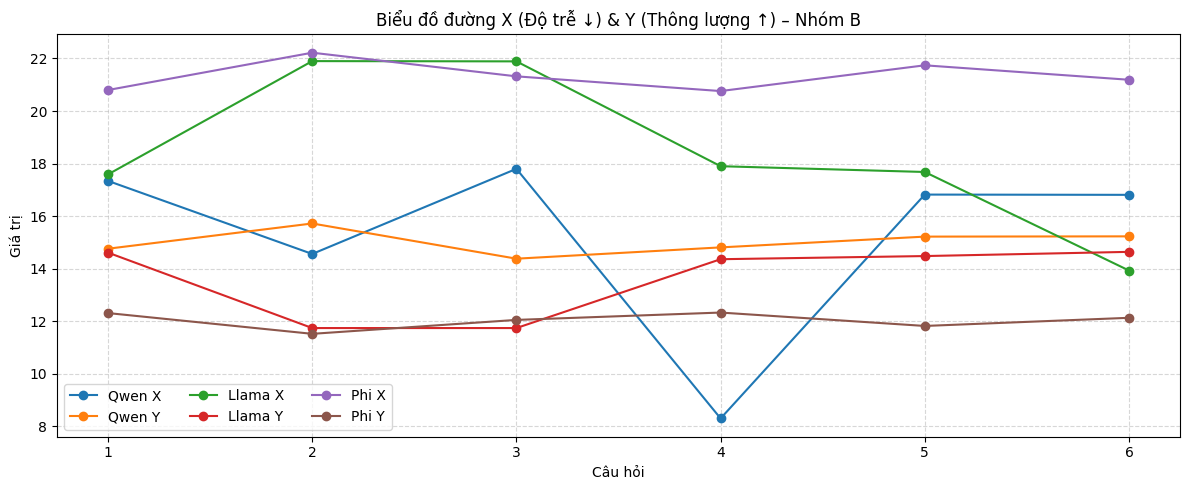

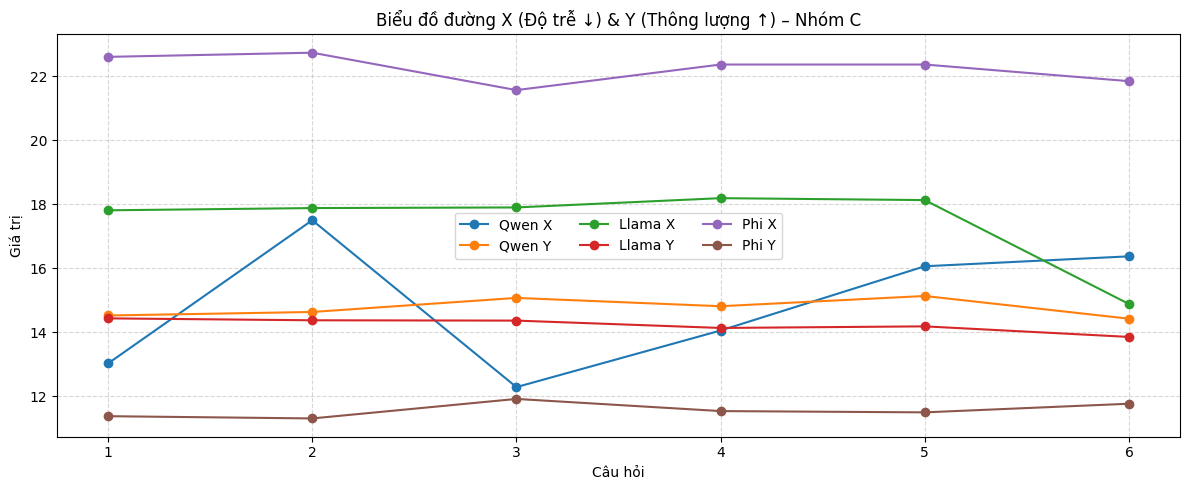

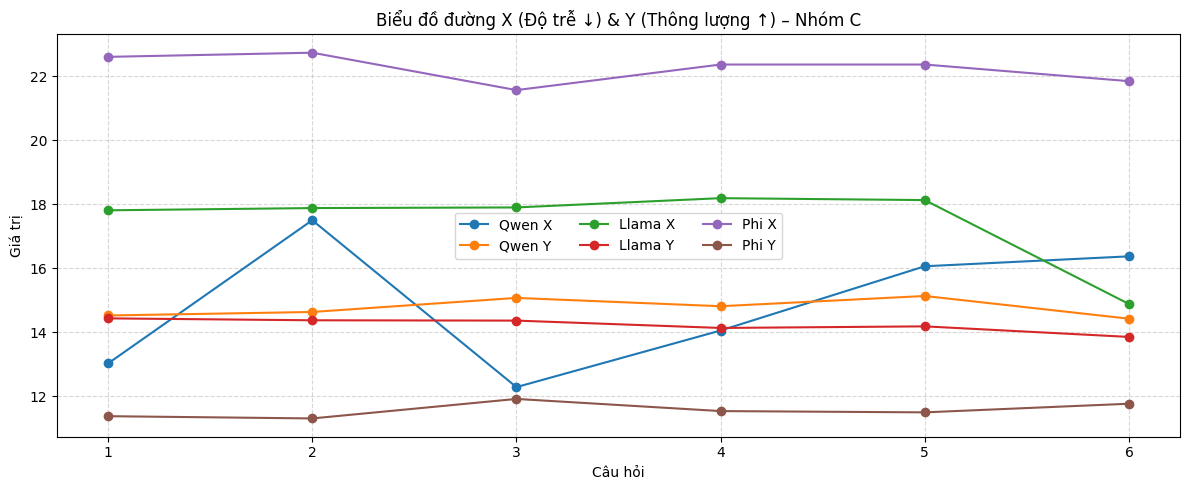

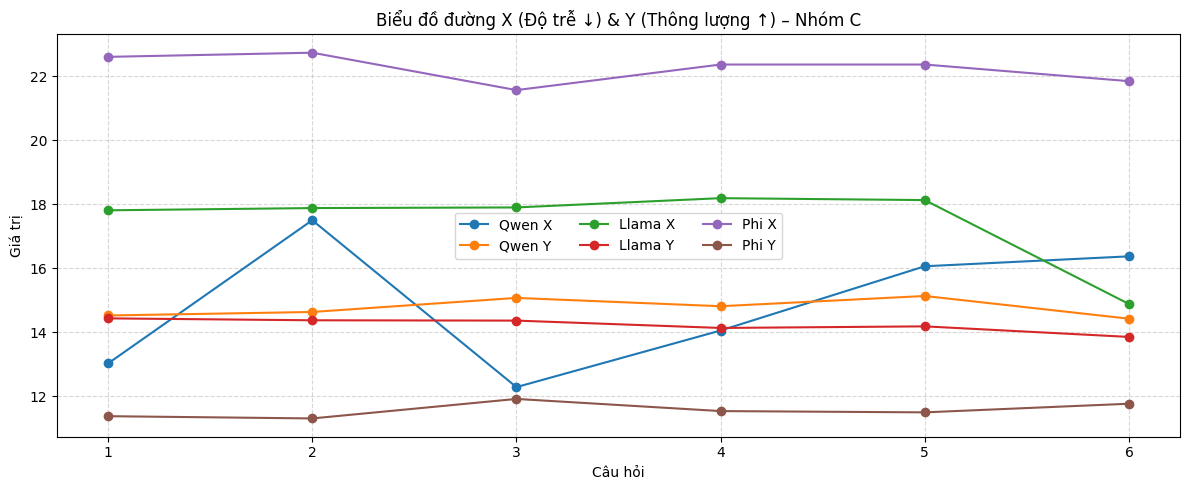

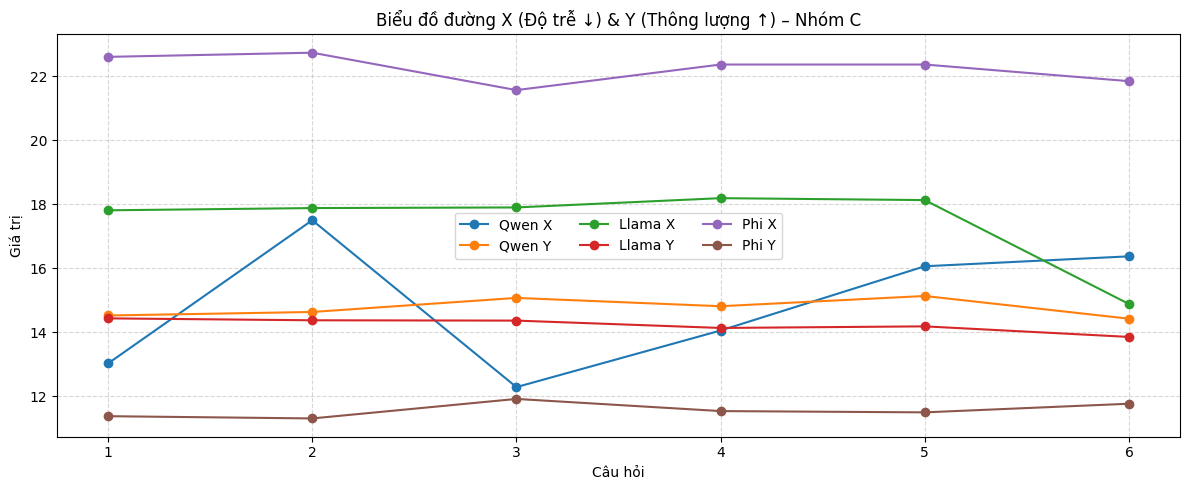

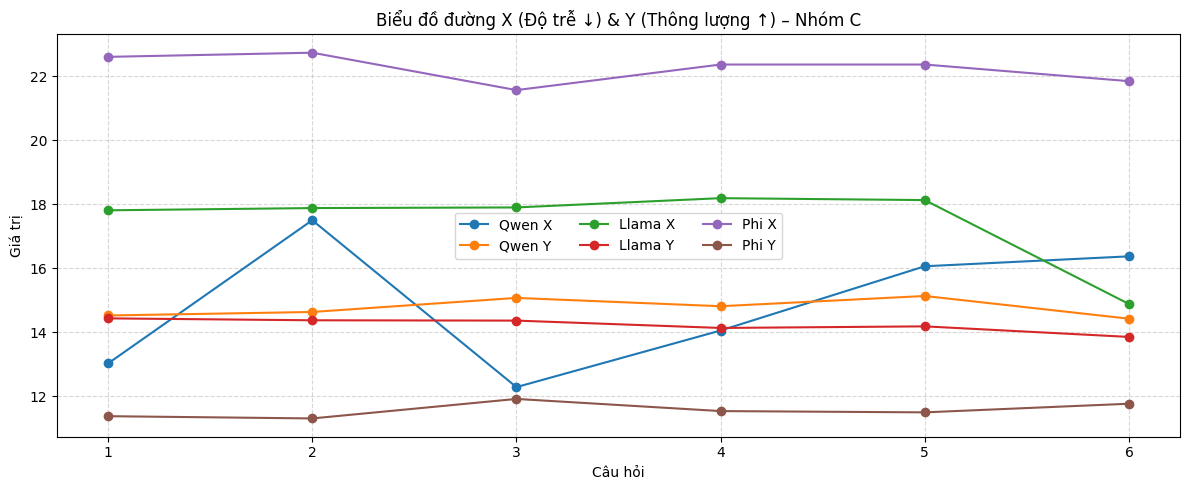

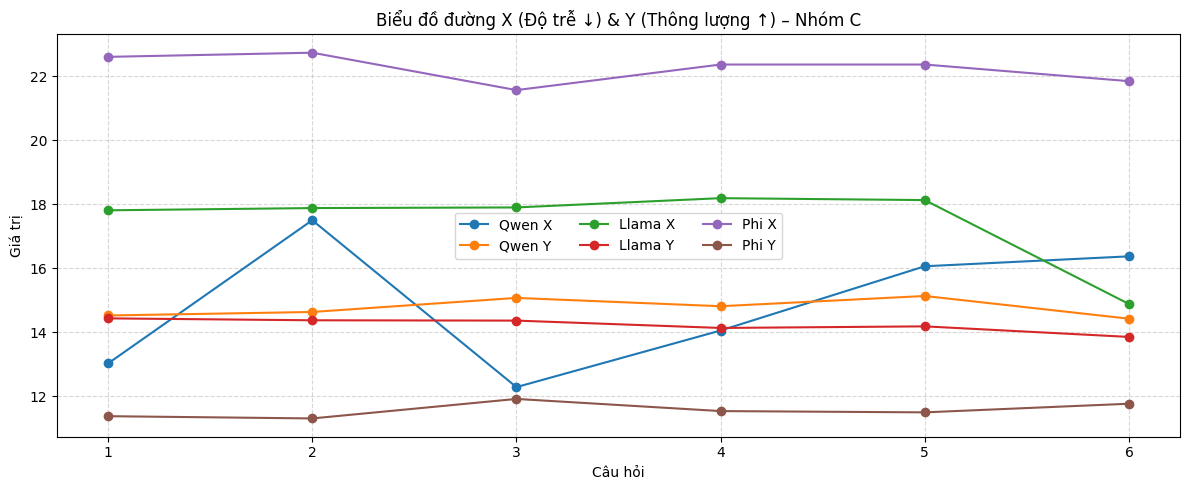

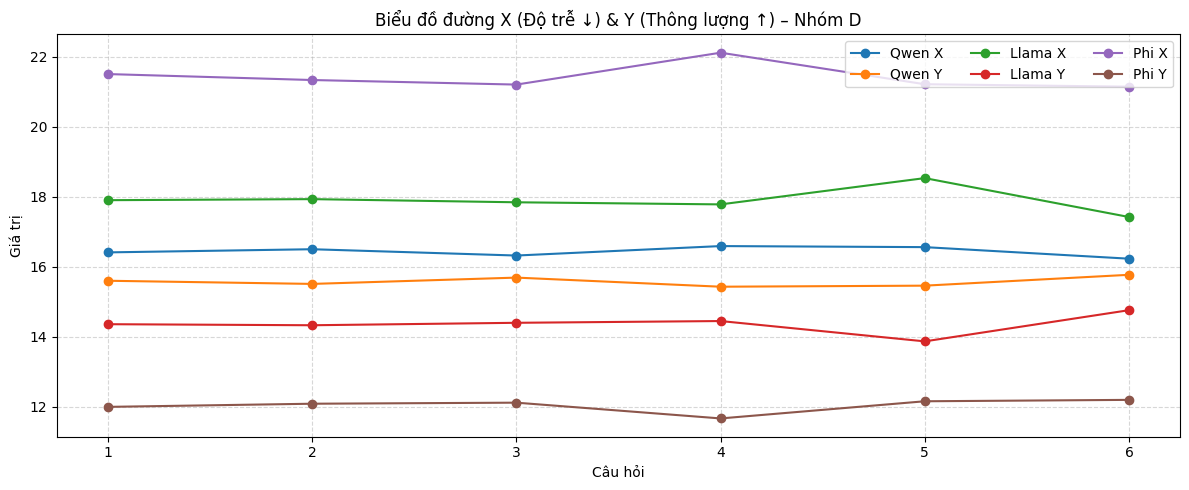

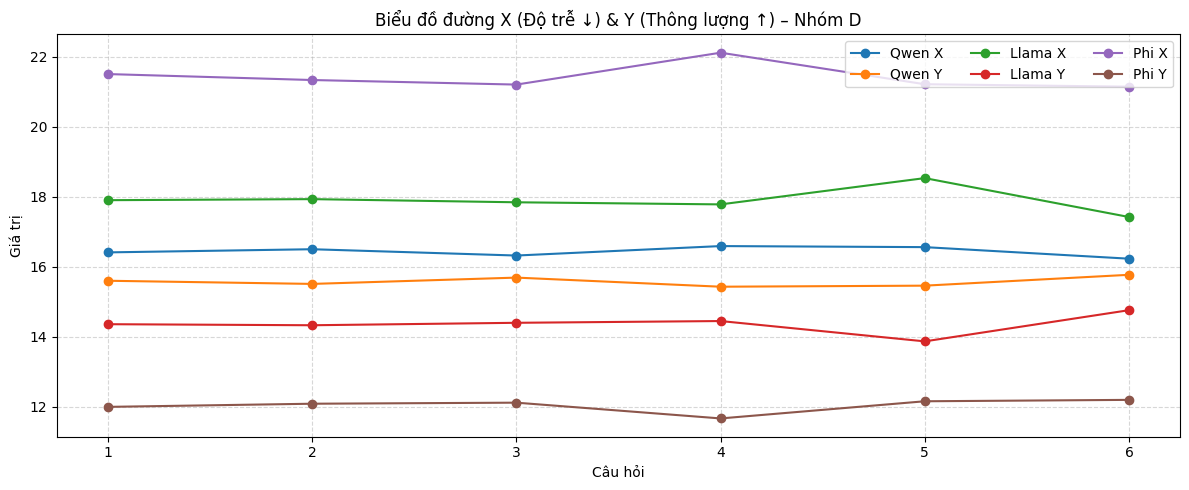

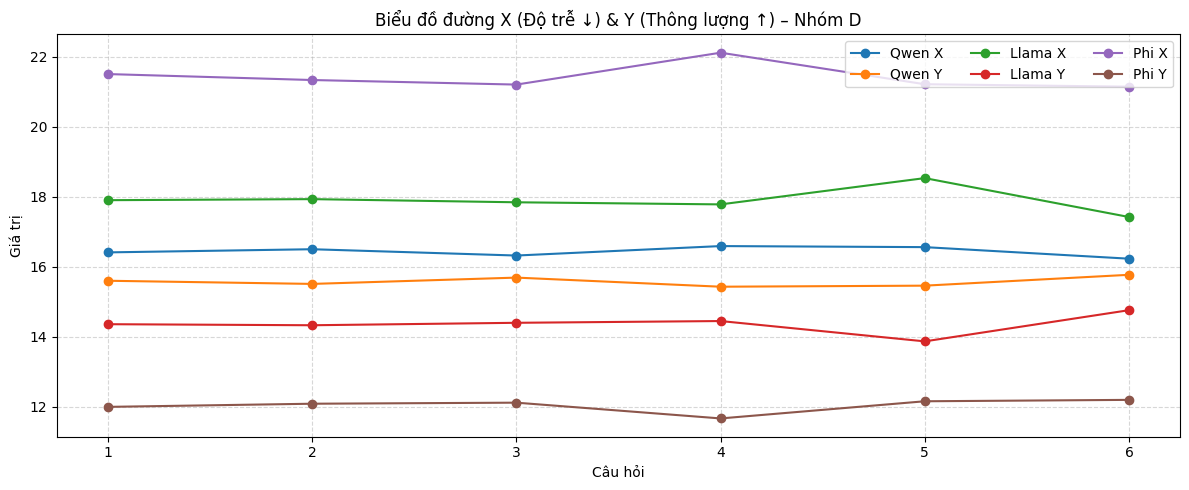

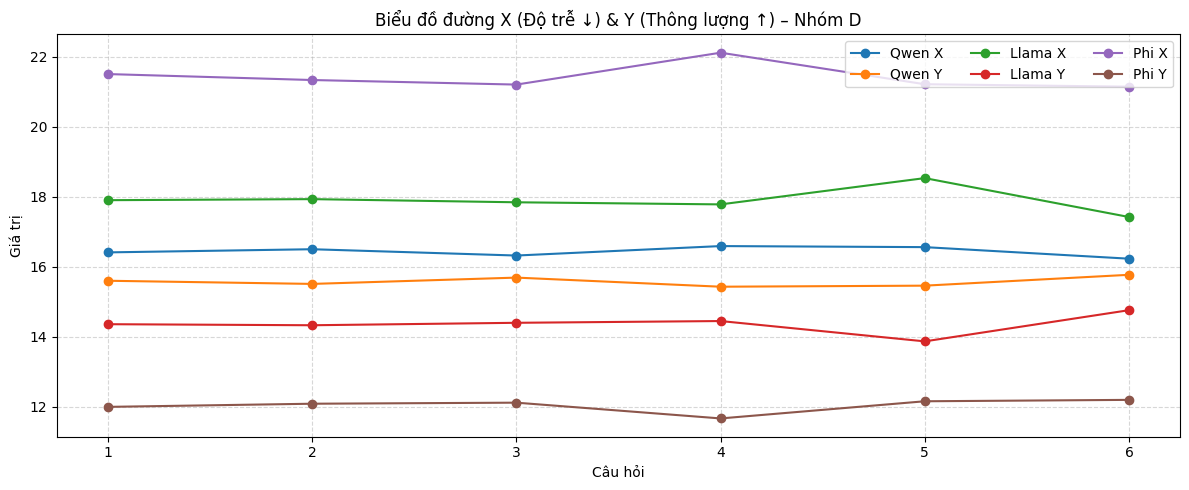

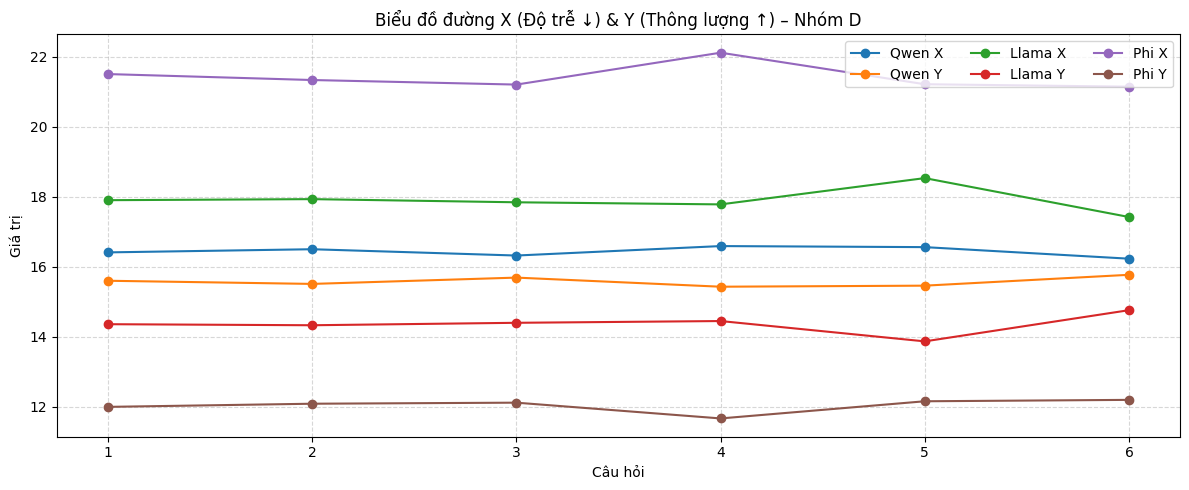

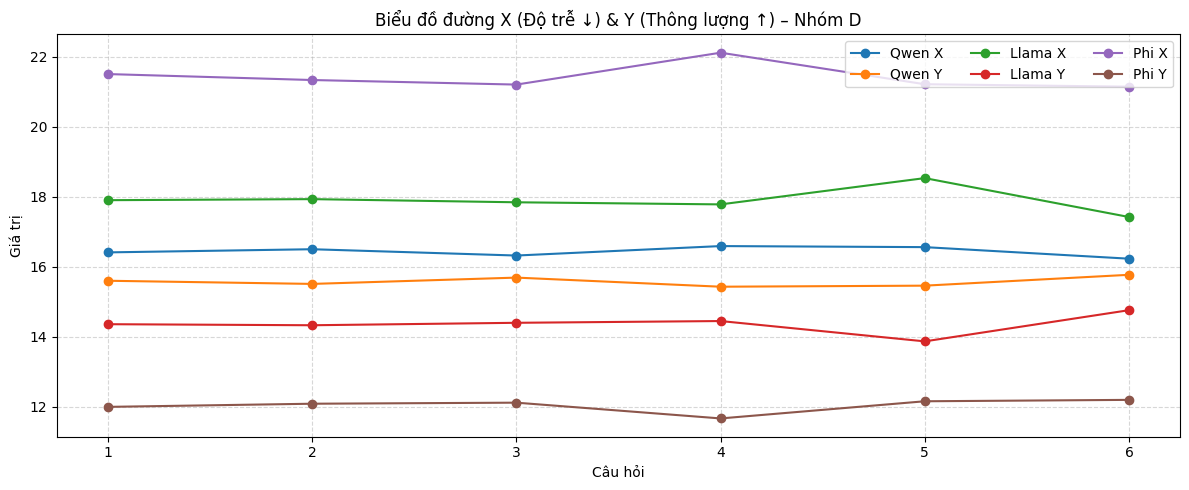

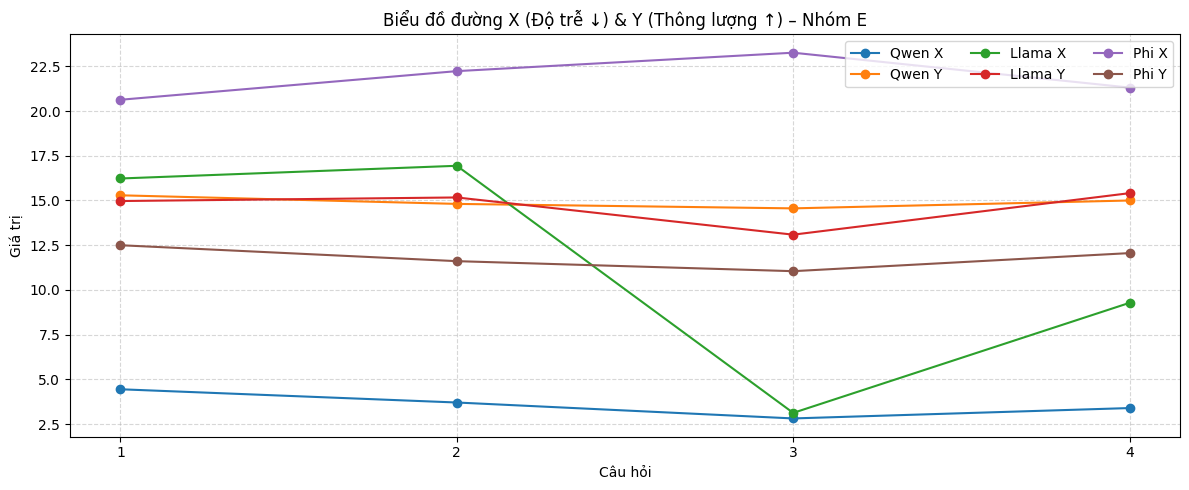

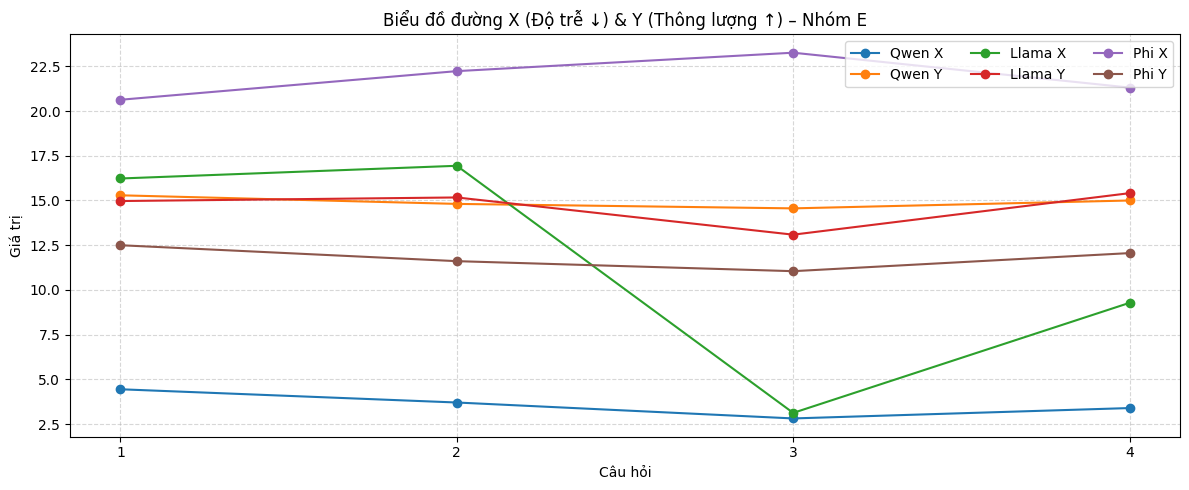

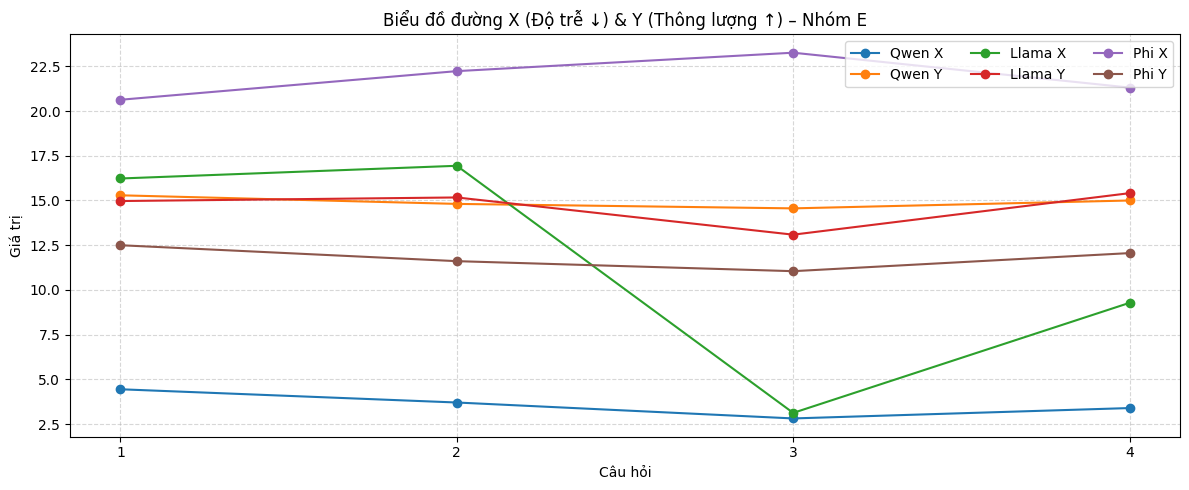

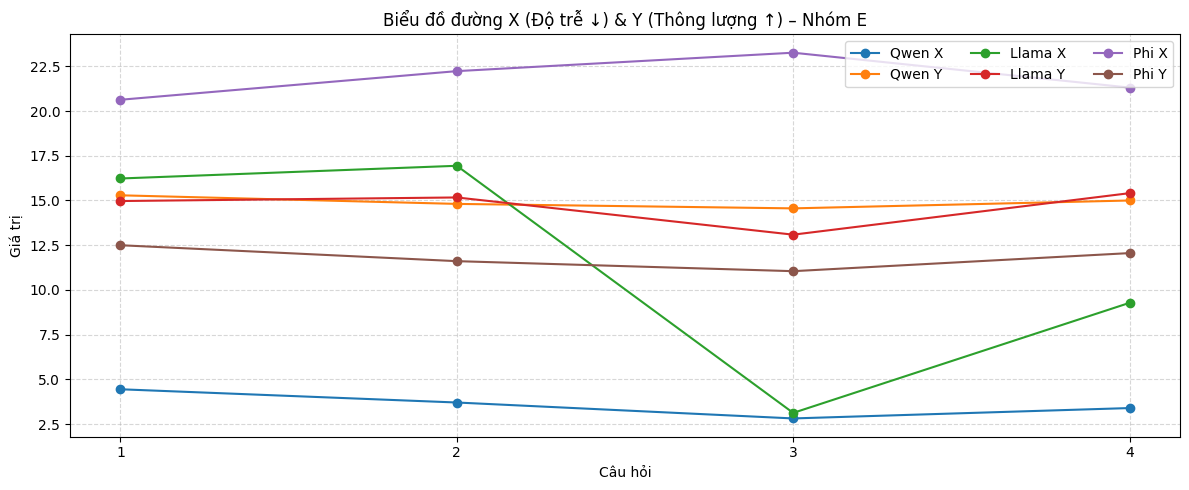

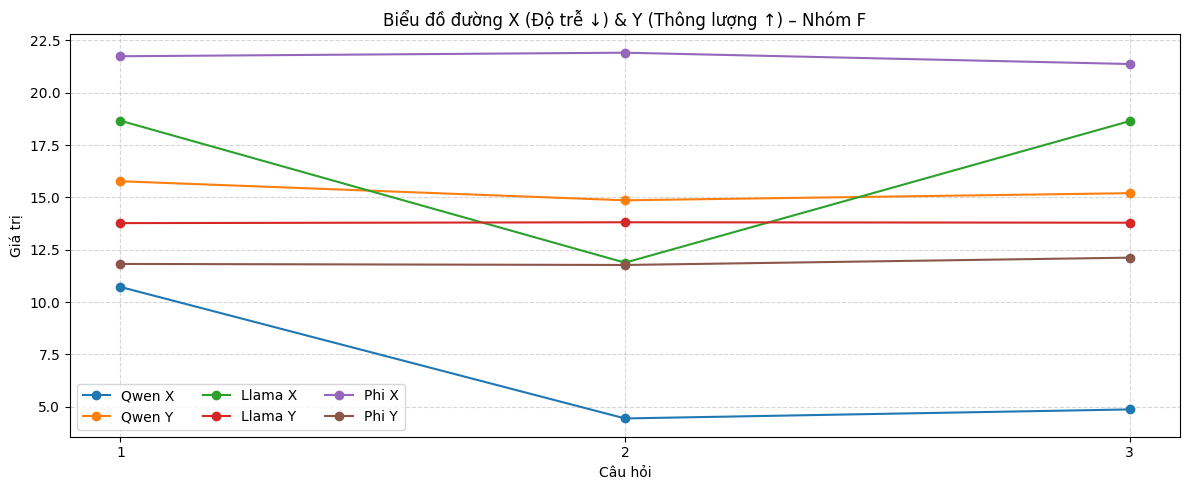

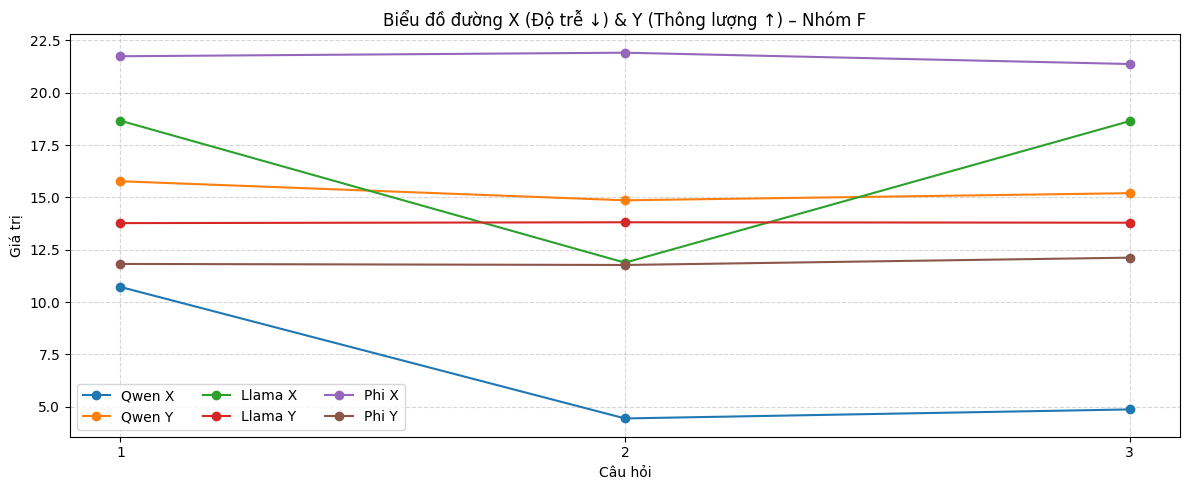

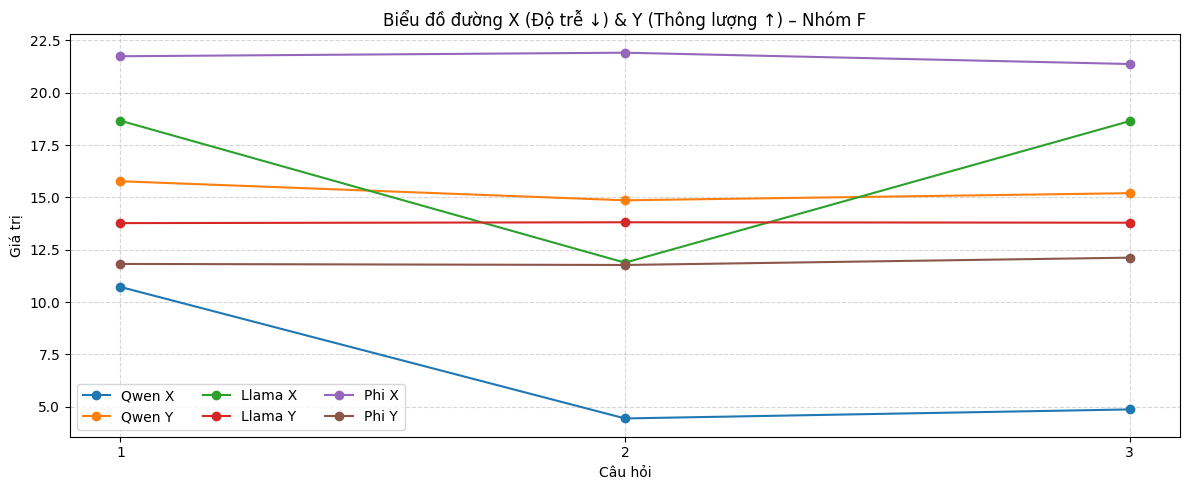

In [149]:
for group in groups:
    plot_xy_line_by_group(
        df,
        ["Qwen X", "Qwen Y", "Llama X", "Llama Y", "Phi X", "Phi Y"],
        f"Biểu đồ đường X (Độ trễ ↓) & Y (Thông lượng ↑) – Nhóm {group}",
        group)

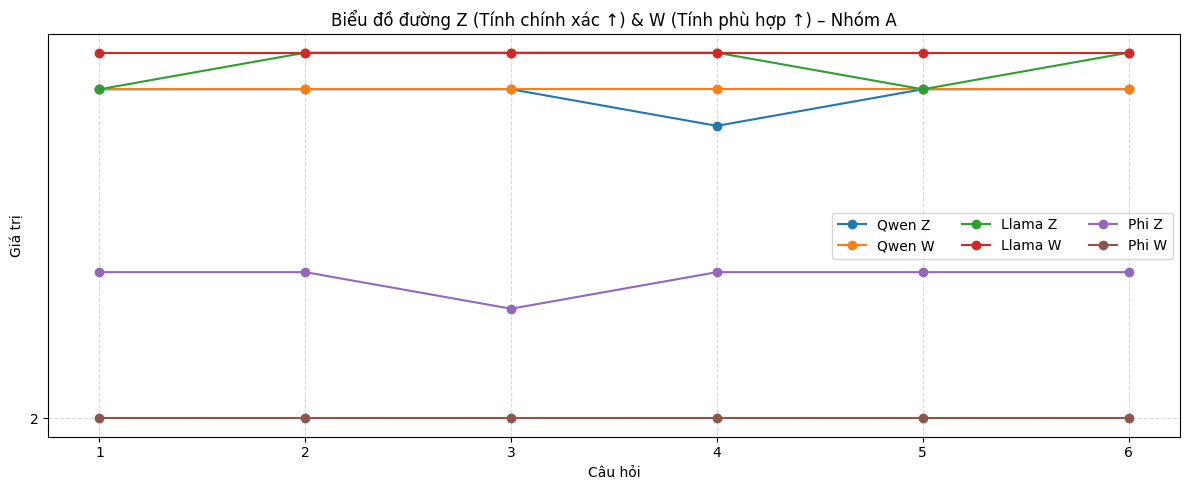

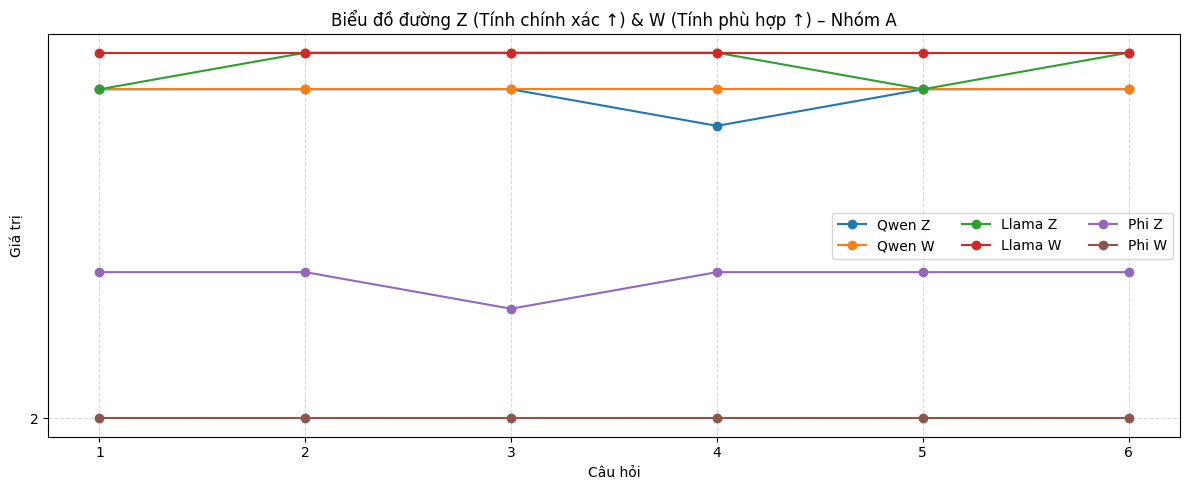

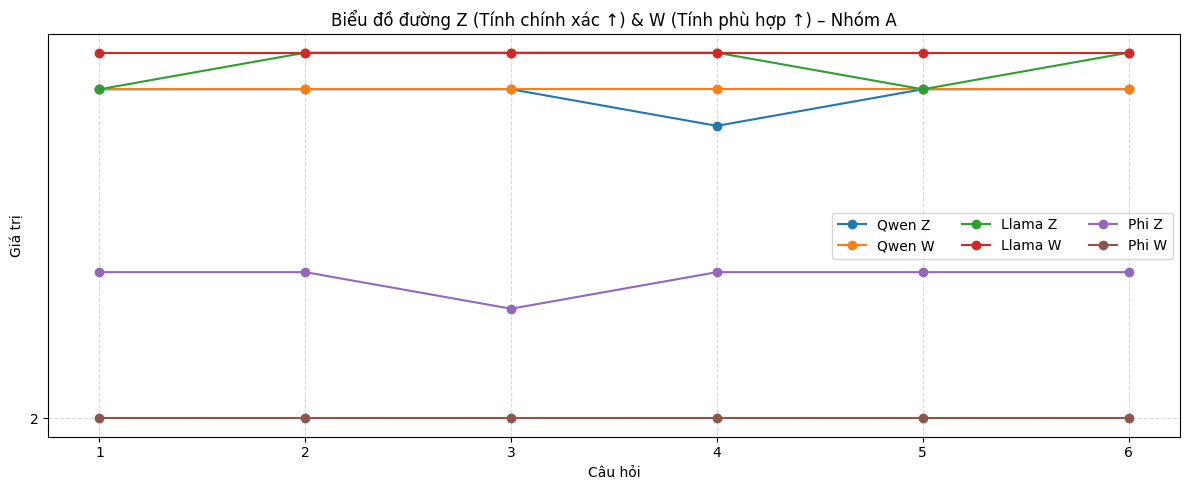

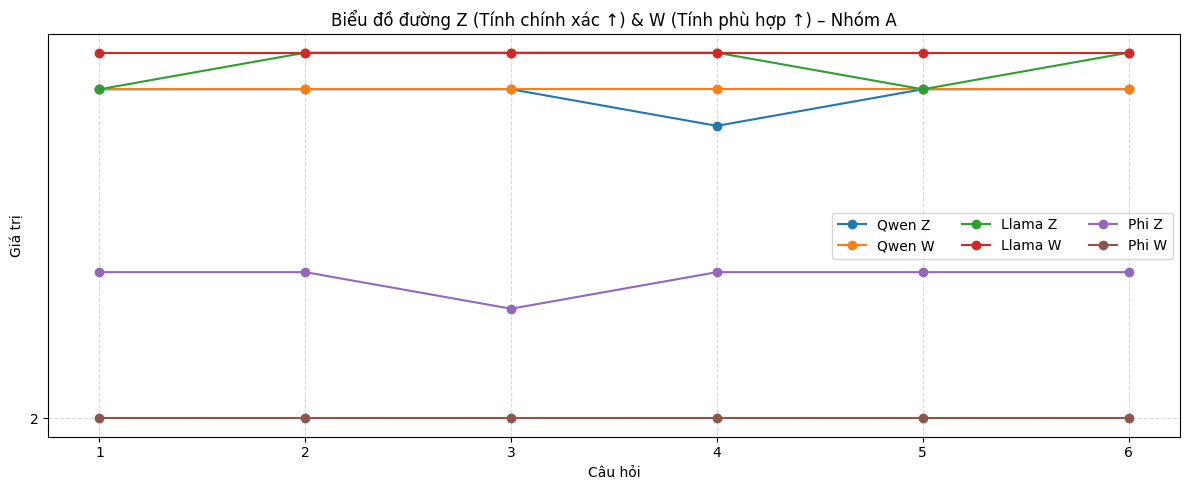

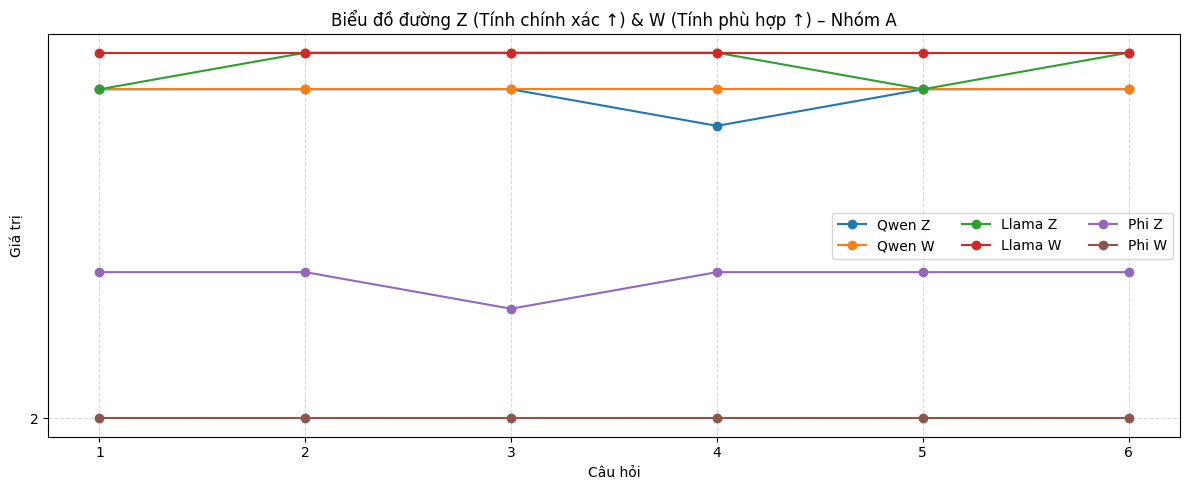

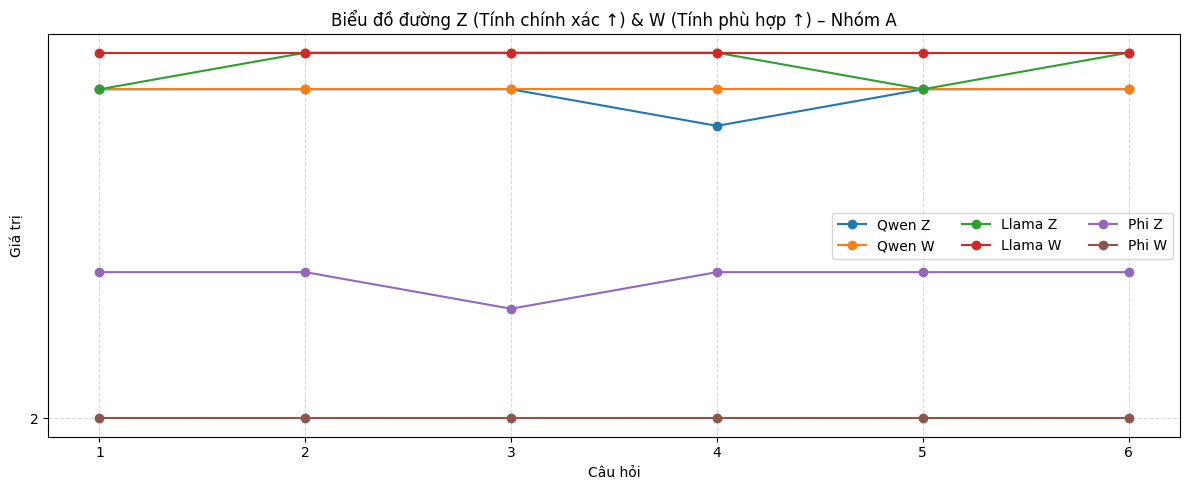

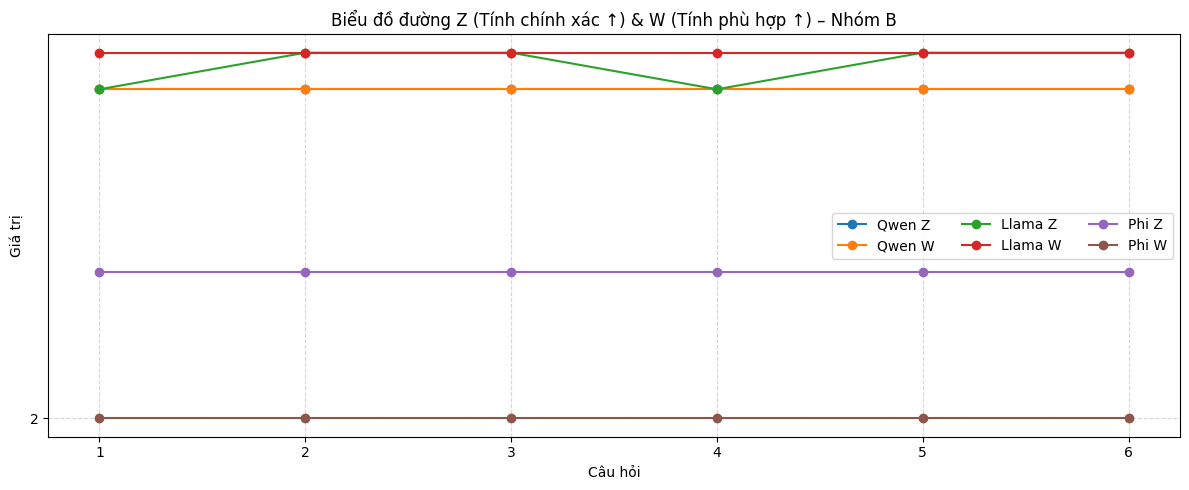

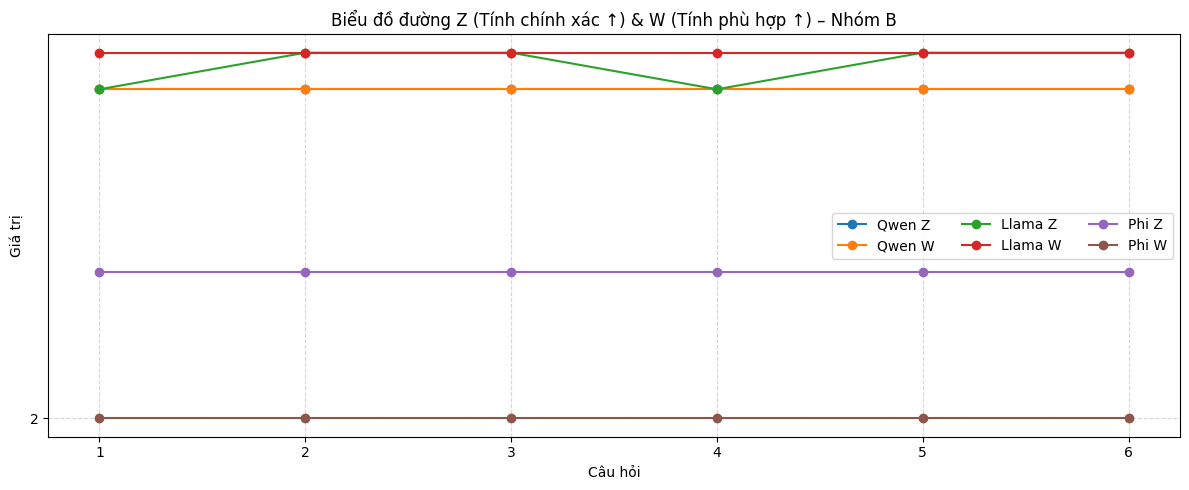

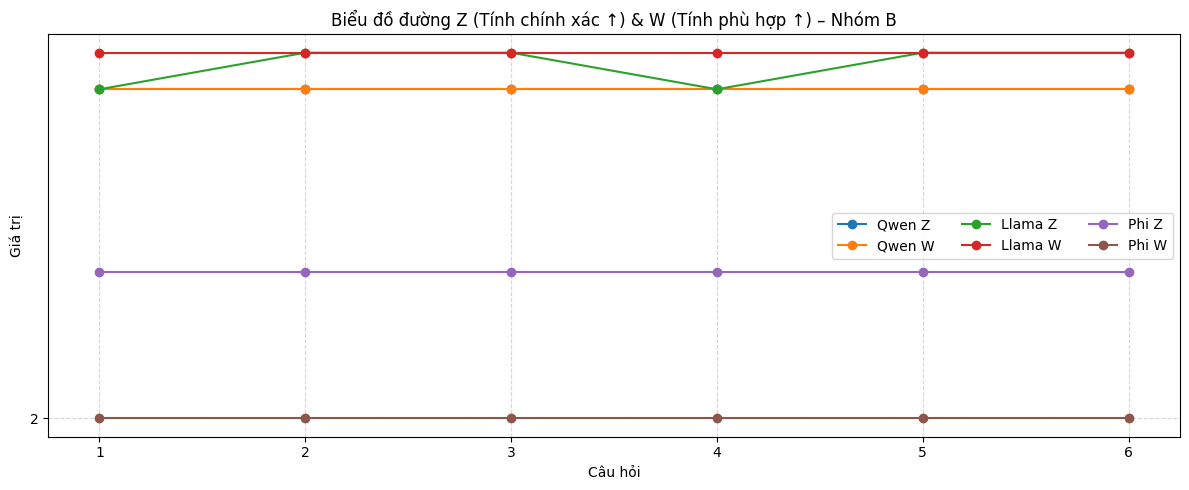

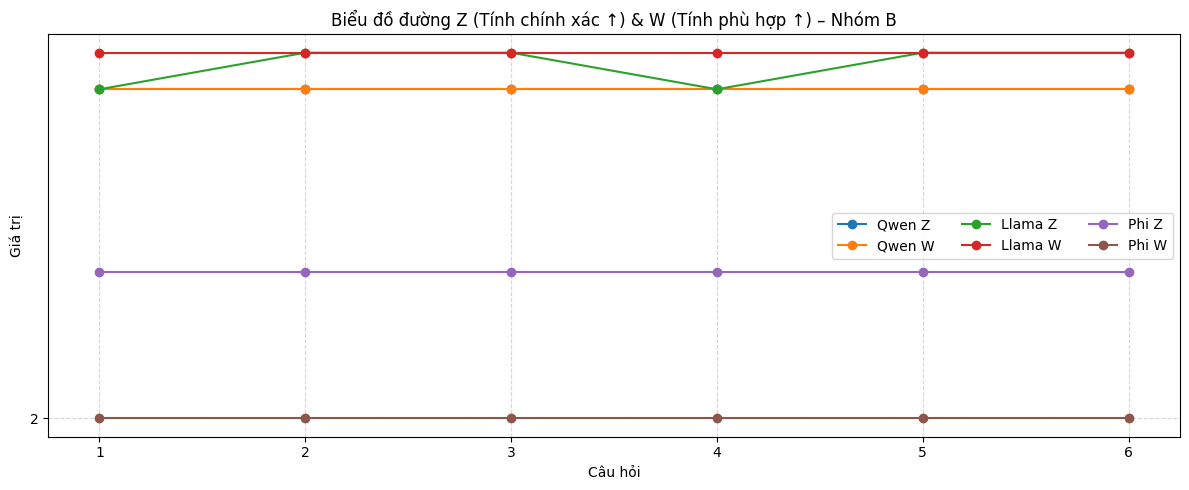

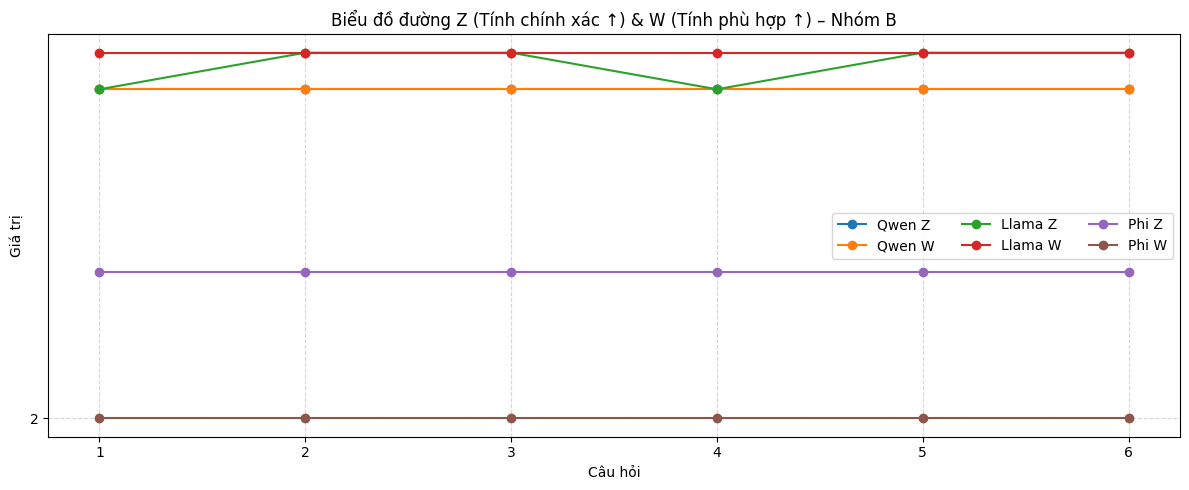

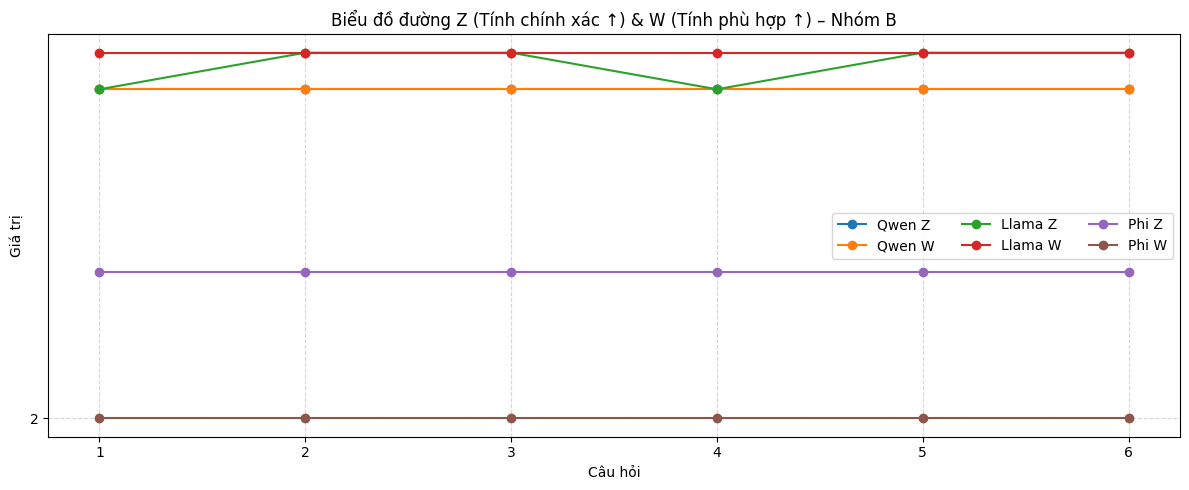

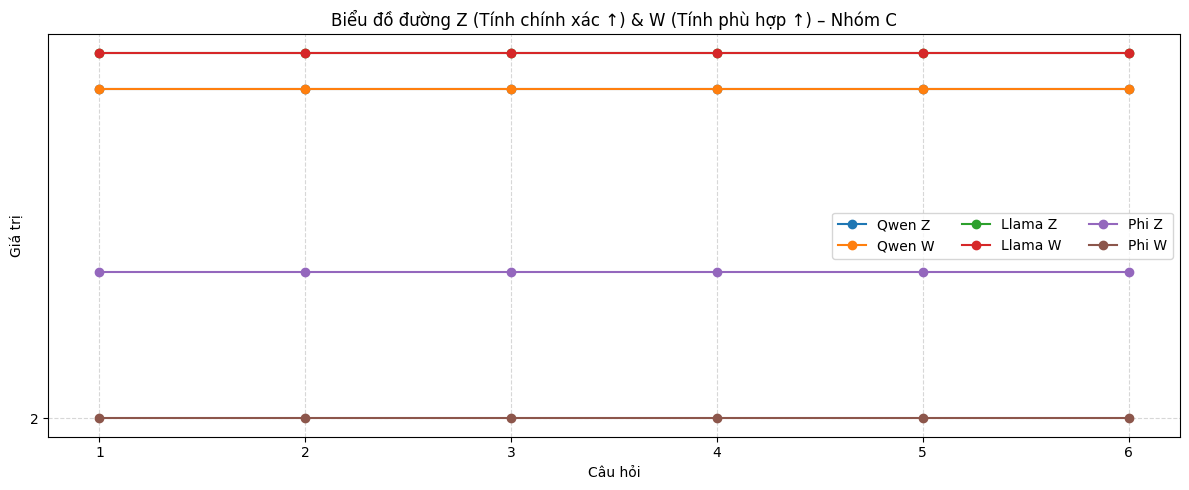

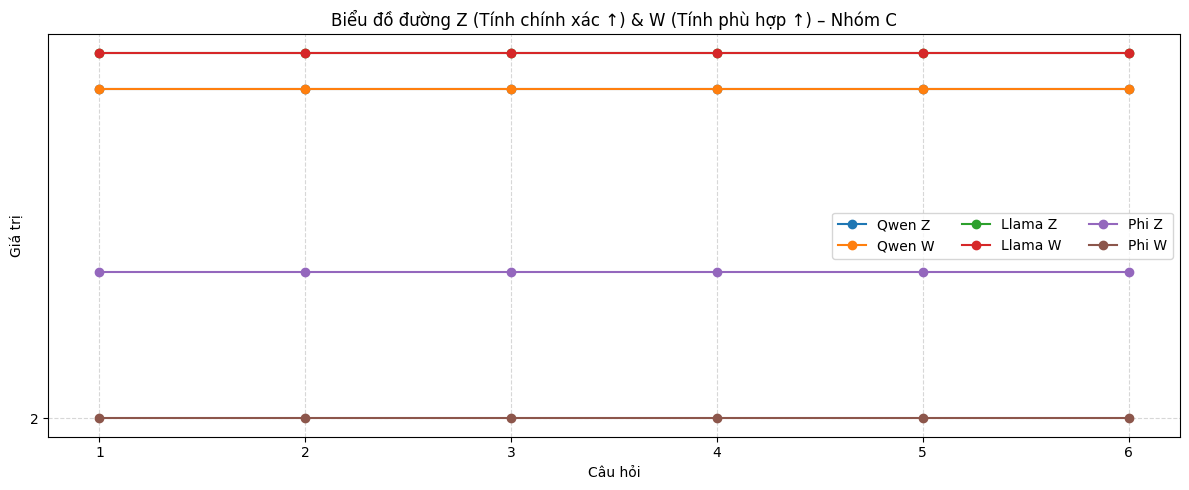

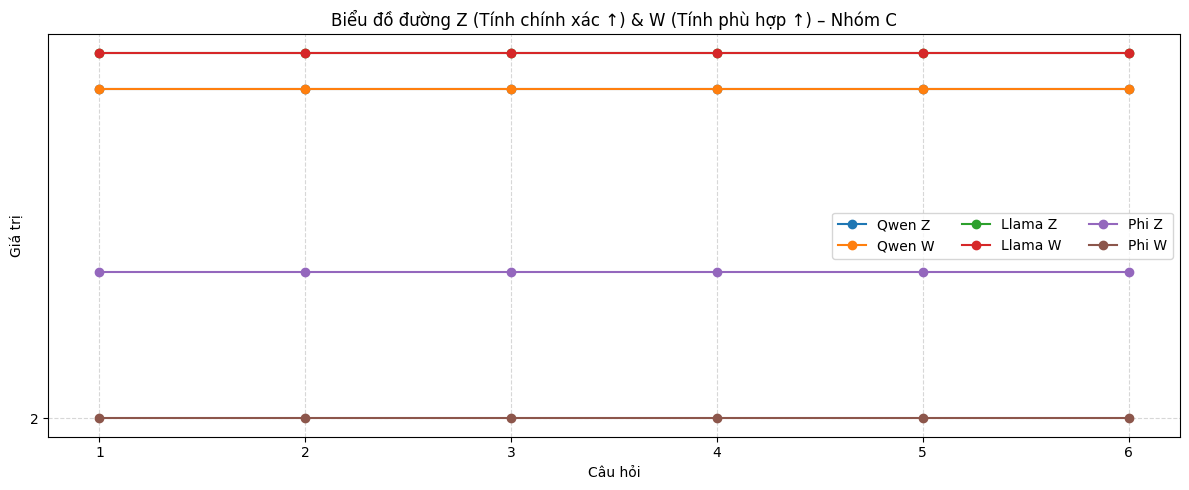

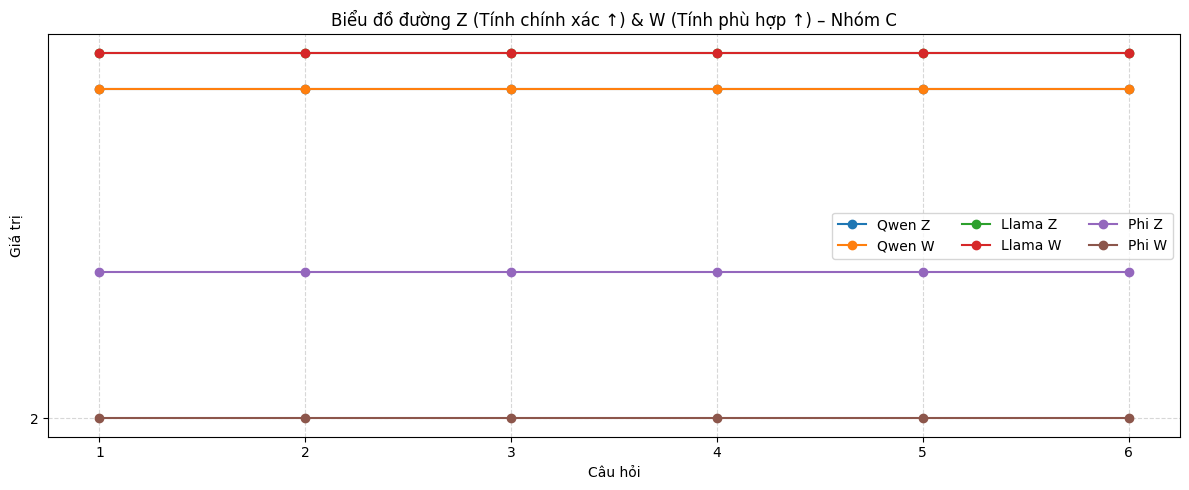

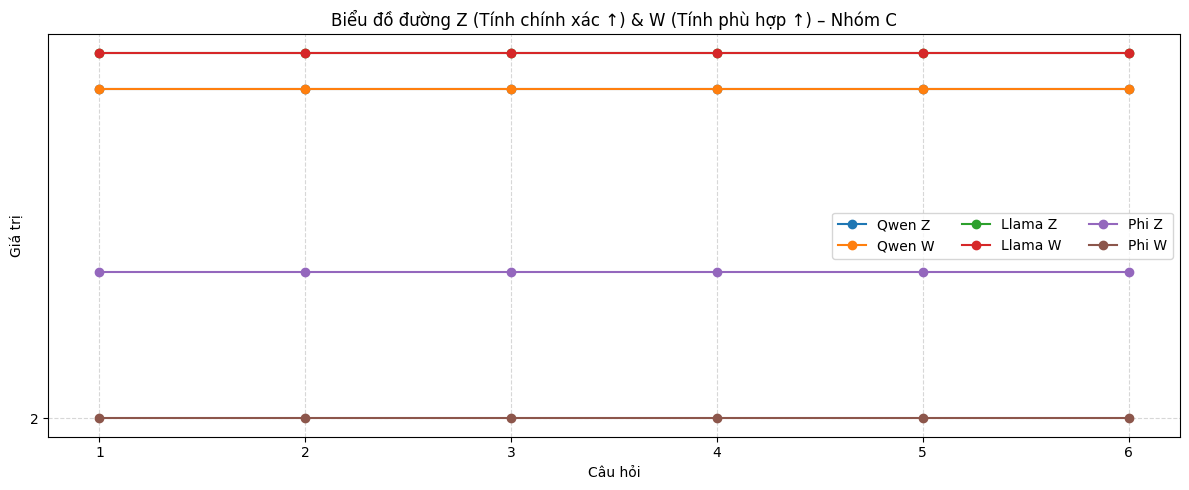

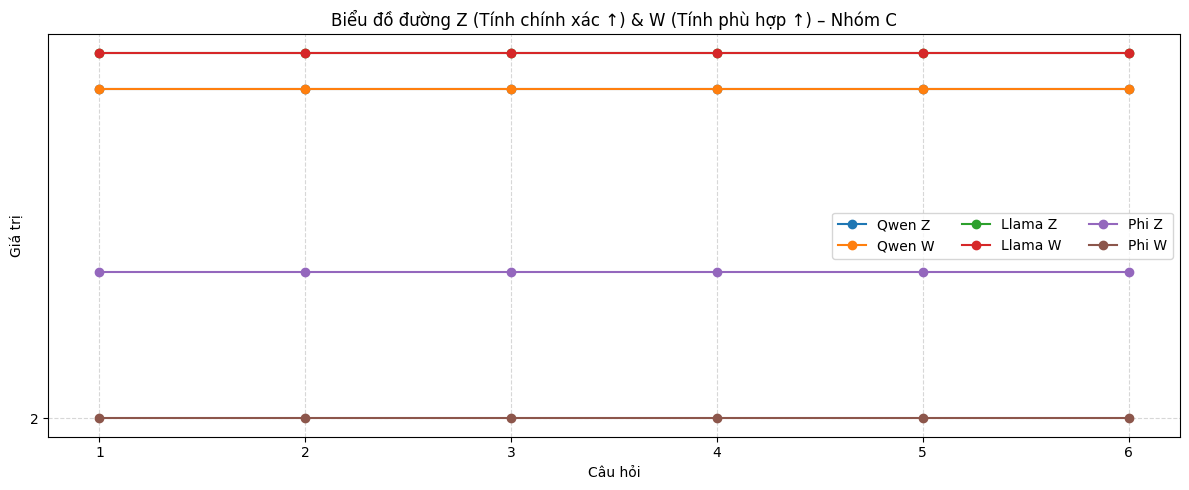

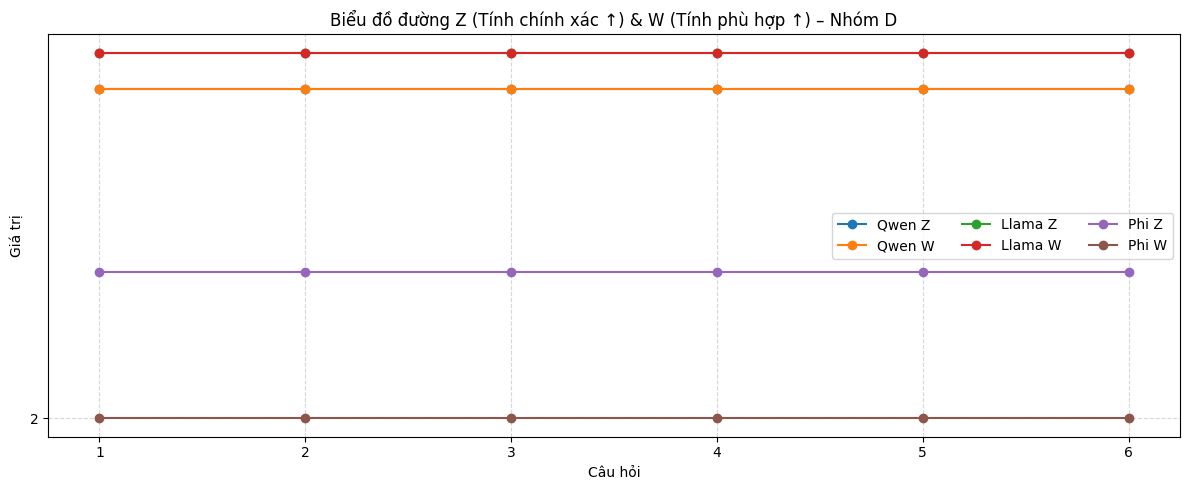

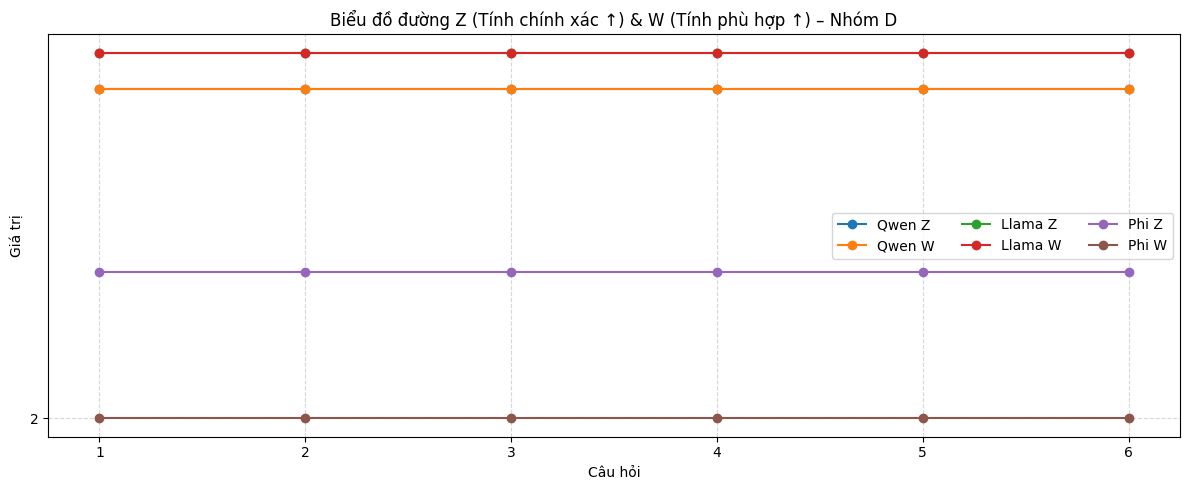

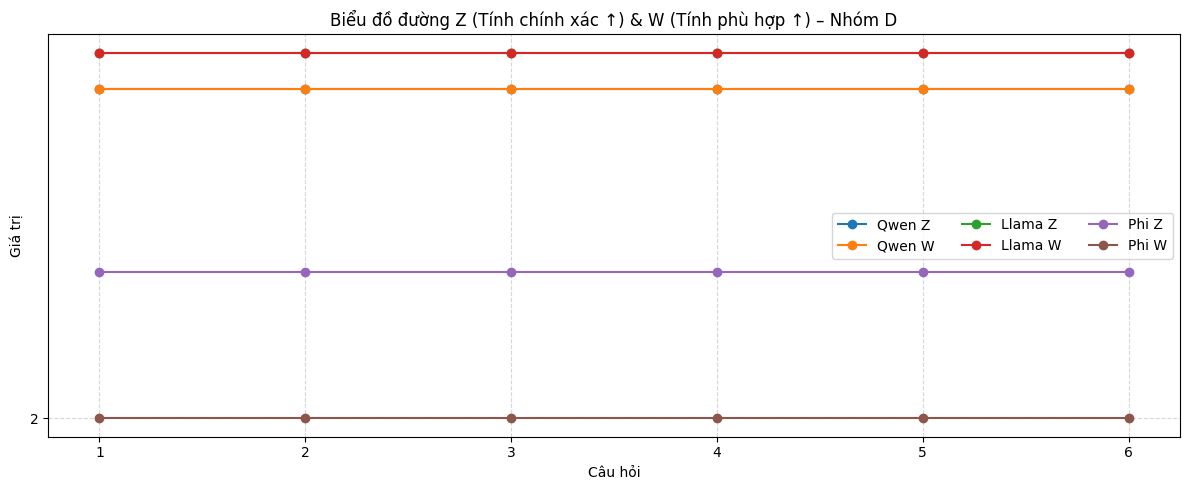

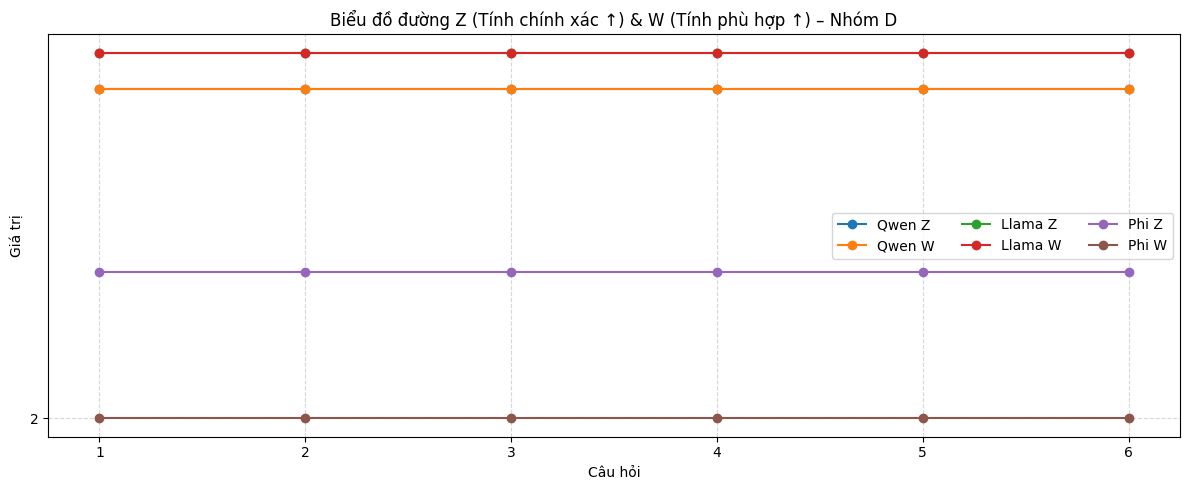

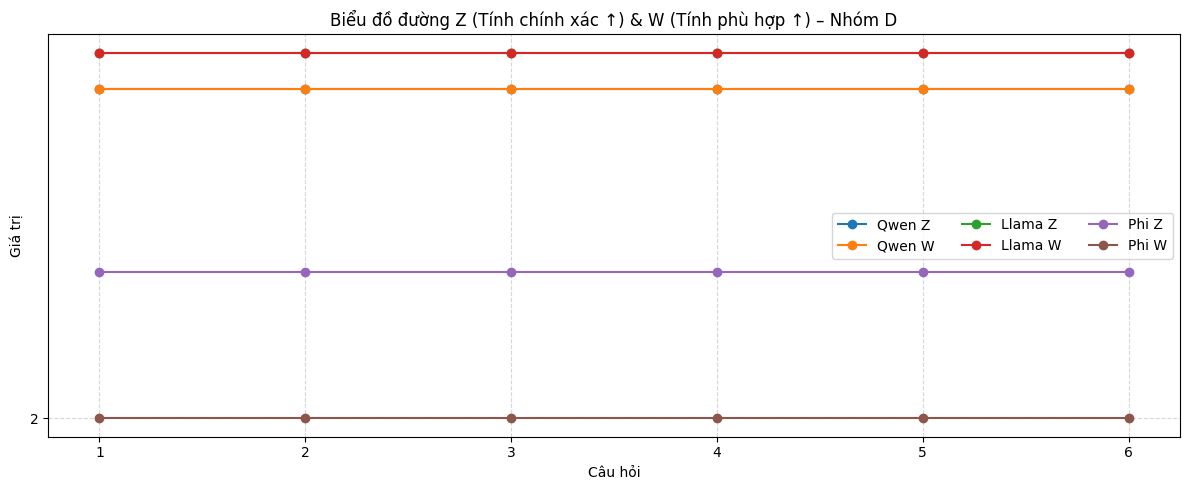

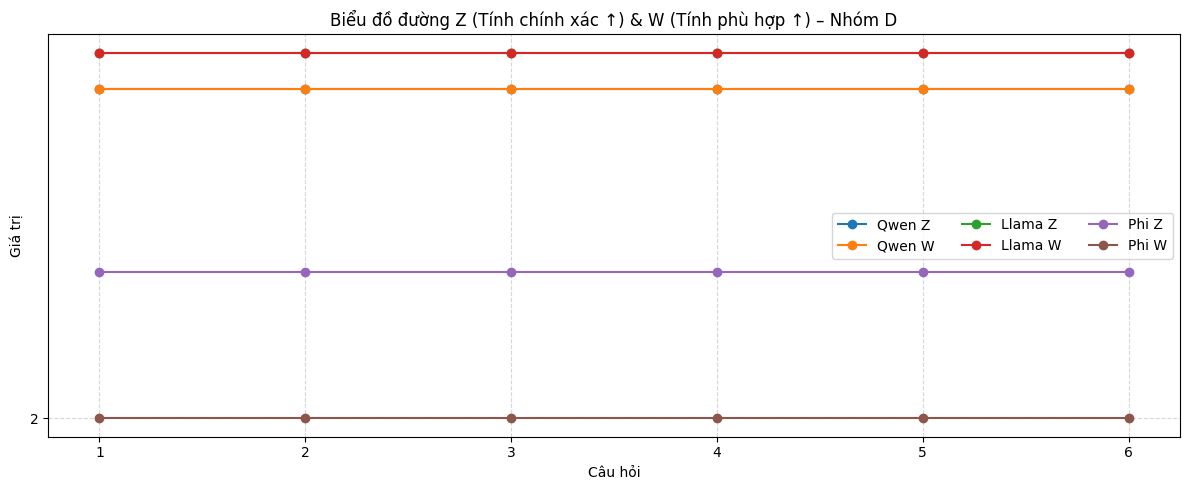

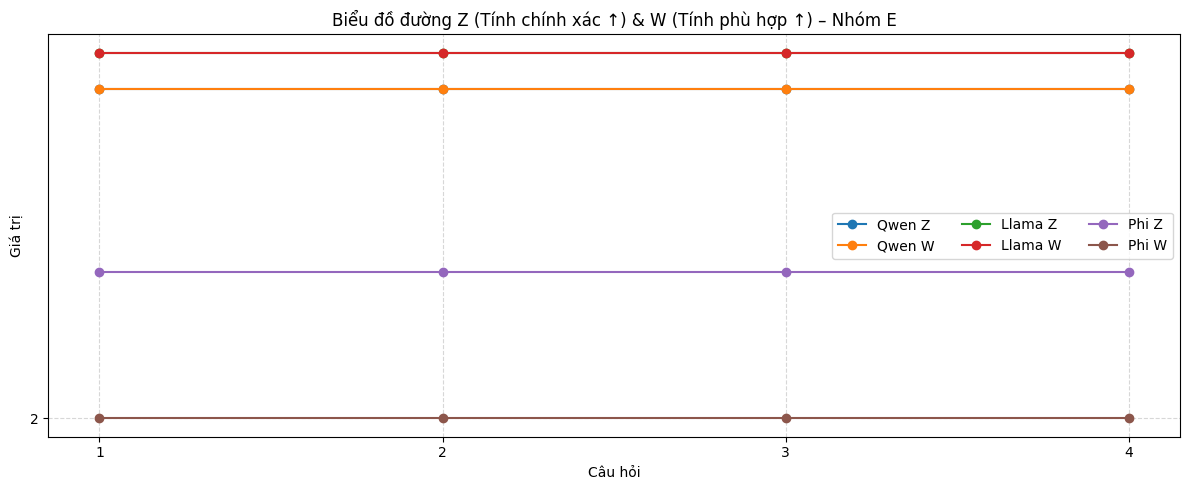

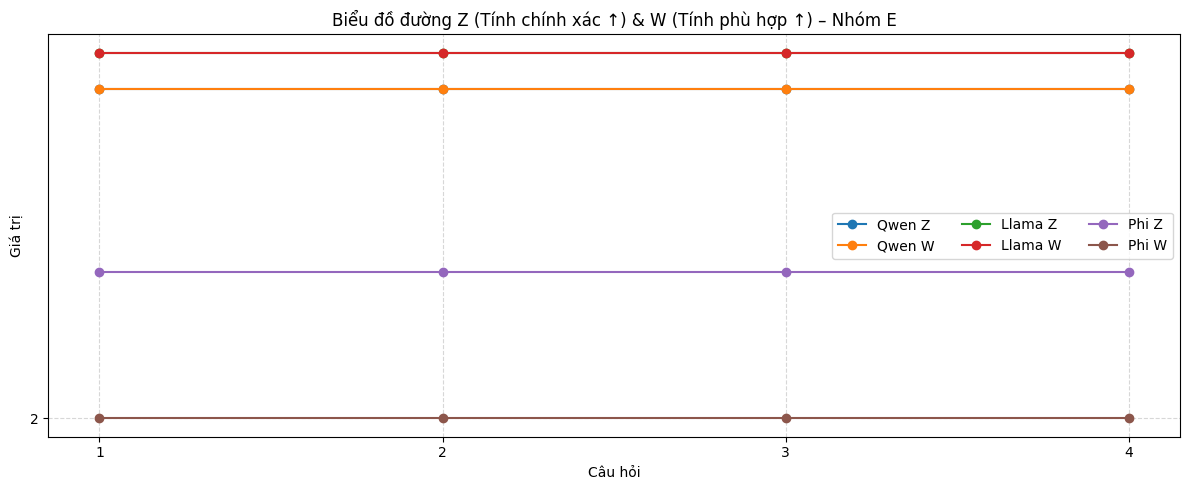

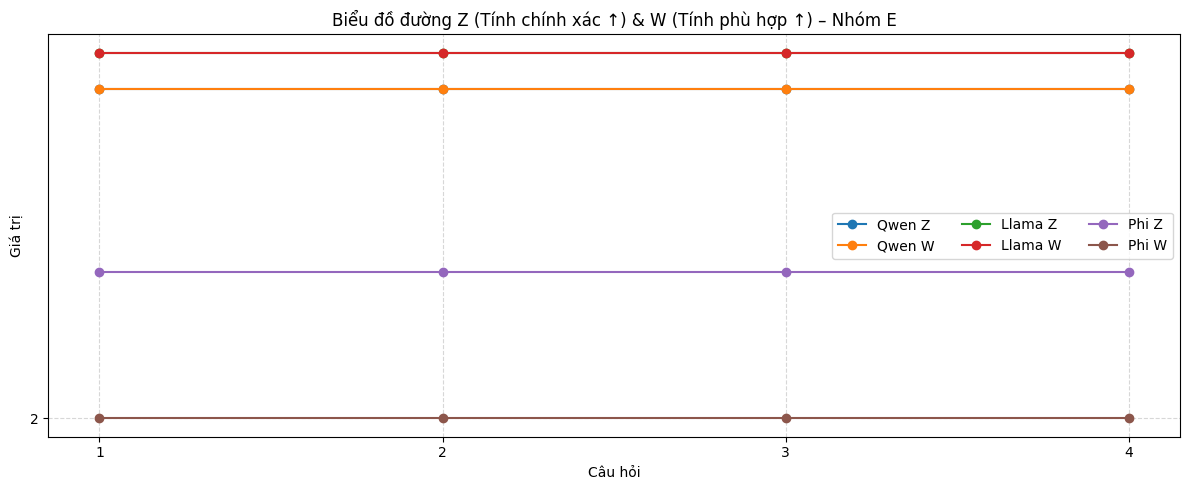

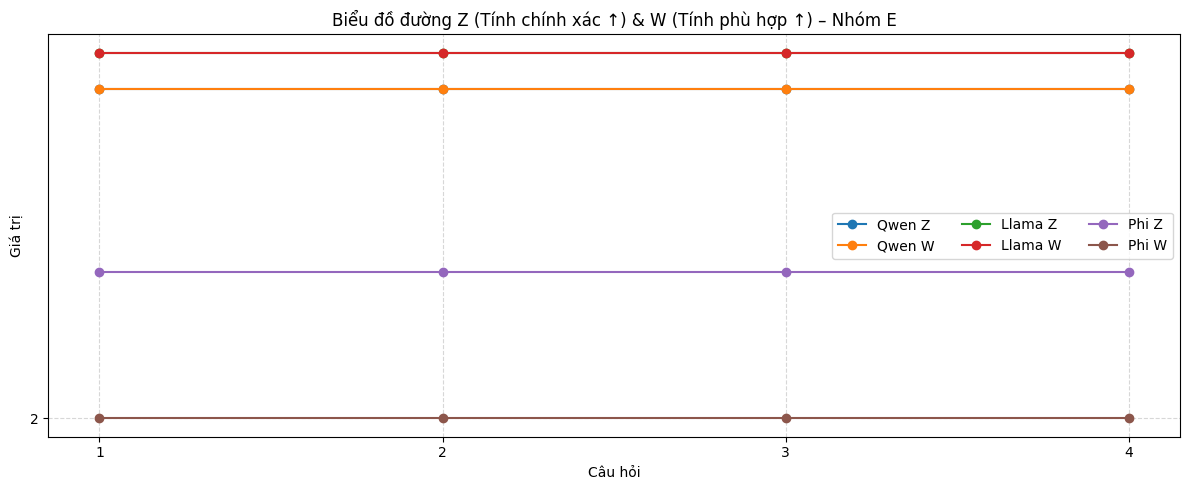

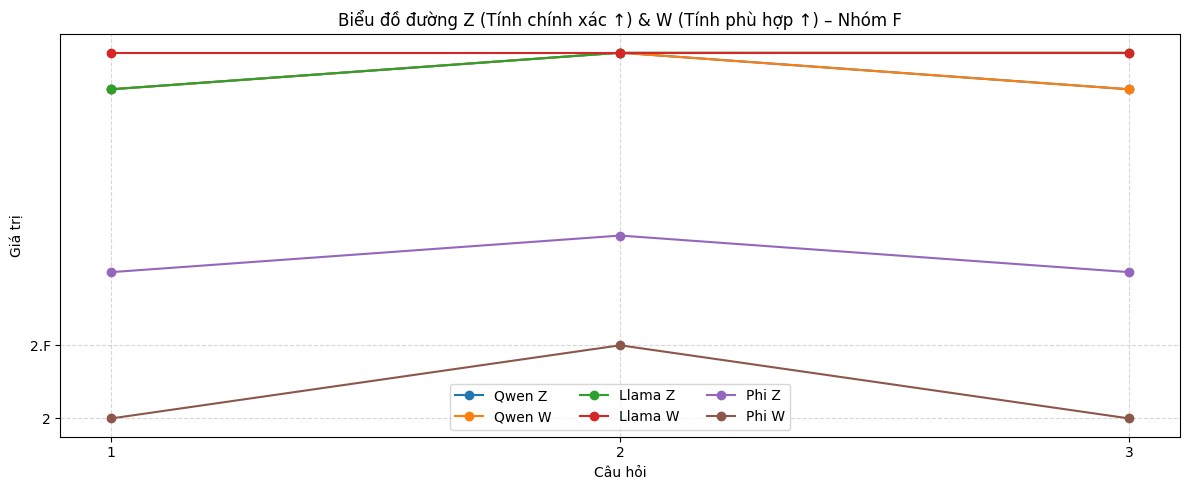

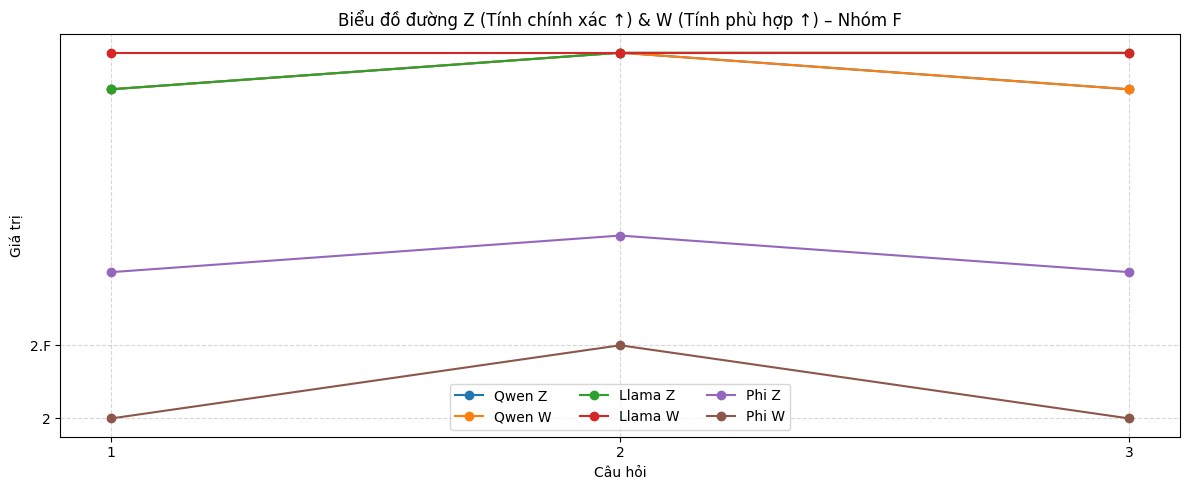

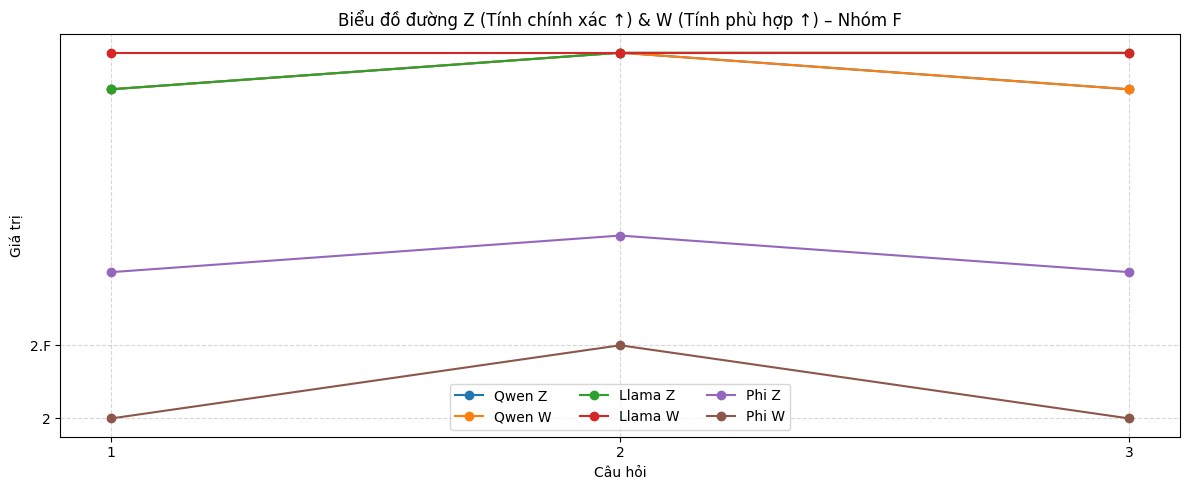

In [150]:
for group in groups:
    plot_xy_line_by_group(
        df,
        cols =["Qwen Z", "Qwen W", "Llama Z", "Llama W", "Phi Z", "Phi W"],
        title=f"Biểu đồ đường Z (Tính chính xác ↑) & W (Tính phù hợp ↑) – Nhóm {group}",
        group_filter=group)

# Biểu diễn kết quả tổng hợp

In [151]:
file_path_sumary = 'results/sumary_evaluation_results.csv'
sumary_df = pd.read_csv(file_path_sumary)

In [152]:
def plot_xy_line_by_group(df, cols, title):
    import matplotlib.pyplot as plt

    groups = df["Nhóm"]

    plt.figure(figsize=(12, 5))

    for col in cols:
        plt.plot(
            groups,
            df[col],
            marker="o",
            label=col
        )

    plt.xlabel("Nhóm câu hỏi")
    plt.ylabel("Giá trị")
    plt.title(title)
    plt.legend(ncol=3)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

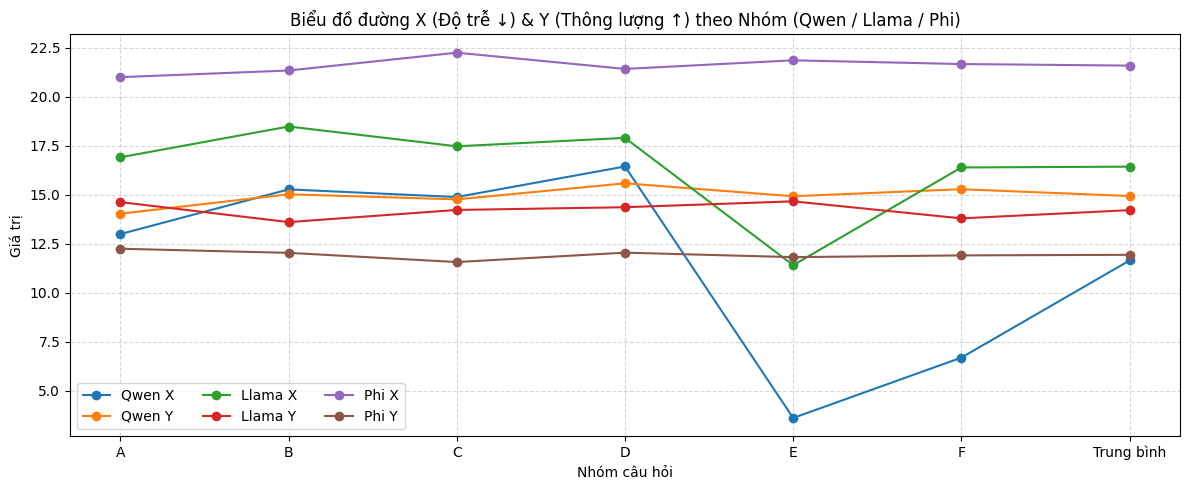

In [153]:
# Biểu diện Độ trễ và thông lượng
plot_xy_line_by_group(sumary_df, 
                      cols=["Qwen X", "Qwen Y", "Llama X", "Llama Y", "Phi X", "Phi Y"],
                      title="Biểu đồ đường X (Độ trễ ↓) & Y (Thông lượng ↑) theo Nhóm (Qwen / Llama / Phi)")


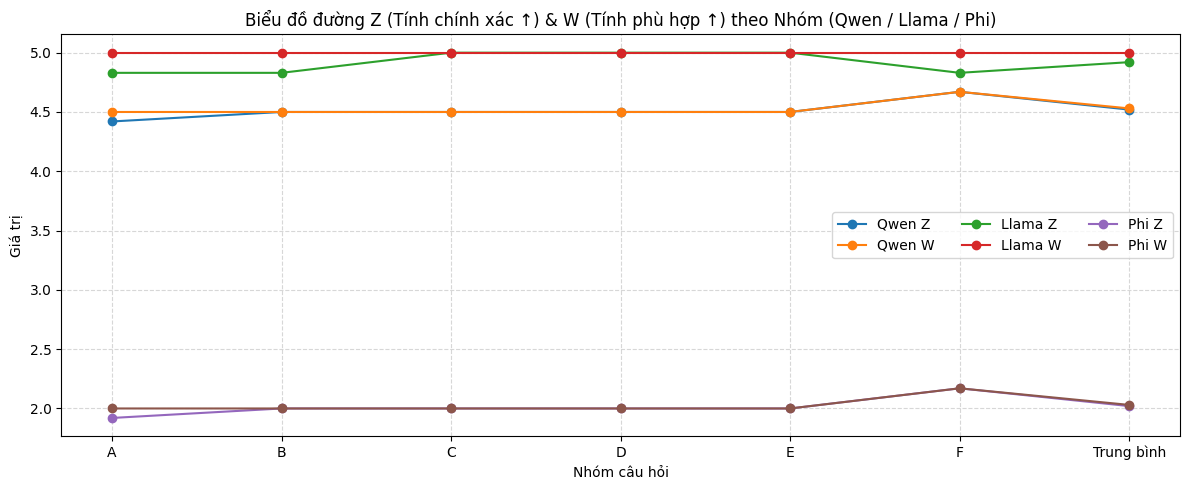

In [154]:
# Biểu diện diễn theo tính chính xác và tính phù hợp
plot_xy_line_by_group(sumary_df, 
                      cols=["Qwen Z", "Qwen W", "Llama Z", "Llama W", "Phi Z", "Phi W"],
                      title="Biểu đồ đường Z (Tính chính xác ↑) & W (Tính phù hợp ↑) theo Nhóm (Qwen / Llama / Phi)")